# Projeto de Análise de Marketing de Clientes

Este projeto tem como objetivo analisar dados de marketing de uma empresa global para entender o comportamento de compra de seus clientes. A base de dados contém informações detalhadas sobre clientes, como perfil demográfico, histórico de compras e interações com campanhas de marketing, permitindo uma análise abrangente dos fatores que influenciam o engajamento e o volume de compras.

A empresa tem investido em várias campanhas de marketing para promover seus produtos e deseja entender melhor como diferentes segmentos de clientes respondem a essas campanhas, quais são os principais gastos e hábitos de compra, e como essas variáveis se relacionam com características como escolaridade, estado civil, renda anual e número de filhos em casa.

### Objetivo

O objetivo principal deste projeto é identificar padrões de comportamento de compra dos clientes, especialmente em relação à resposta às campanhas de marketing, para melhorar a segmentação e personalização das ofertas da empresa. Além disso, o projeto busca fornecer insights sobre:

> 1- Quais fatores demográficos influenciam mais os gastos dos clientes em diferentes categorias de produtos ?

> 2- Qual é o perfil dos clientes mais engajados em campanhas de marketing ?

> 3- A relação entre o estado civil, escolaridade e renda com o volume de compras ?

> 4- Como as compras variam entre diferentes canais (web, catálogo, loja física) e como isso pode ser otimizado ?

* Esses insights permitirão à empresa tomar decisões baseadas em dados para aprimorar suas estratégias de marketing e aumentar a retenção e o engajamento de clientes.

#### Descrição das colunas

**ID:** Identificação única do cliente.<br>
**Ano Nascimento:** Ano de nascimento do cliente.<br>
**Escolaridade:** Nível de escolaridade do cliente.<br>
**Estado Civil:** Estado civil do cliente.<br>
**Salario Anual:** Renda anual do cliente (numérico).<br>
**Filhos em Casa:** Número de filhos menores em casa.<br>
**Adolescentes em Casa:** Número de adolescentes em casa.<br>
**Data Cadastro:** Data de cadastro do cliente.<br>
**Dias Desde Ultima Compra:** Dias desde a última compra realizada.<br>
**Gasto com Eletronicos:** Valor gasto em eletrônicos.<br>
**Gasto com Brinquedos:** Valor gasto em brinquedos.<br>
**Gasto com Moveis:** Valor gasto em móveis.<br>
**Gasto com Utilidades:** Valor gasto em utilidades domésticas.<br>
**Gasto com Alimentos:** Valor gasto em alimentos.<br>
**Gasto com Vestuario:** Valor gasto em vestuário.<br>
**Numero de Compras com Desconto:** Número de compras com desconto.<br>
**Numero de Compras na Web:** Número de compras realizadas pela web.<br>
**Numero de Compras via Catalogo:** Número de compras feitas via catálogo.<br>
**Numero de Compras na Loja:** Número de compras realizadas em lojas físicas.<br>
**Numero Visitas WebSite Mes:** Número de visitas ao site por mês.<br>
**Compra na Campanha 1 a 5:** Indica se o cliente comprou em cada uma das campanhas de marketing (binário: 0 = não comprou, 1 = comprou).<br>
**Comprou:** Se o cliente realizou uma compra após as campanhas (binário: 0 = não, 1 = sim).<br>
**Pais:** País de origem do cliente.<br>

In [1]:
#Importando as bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r'dados_marketing.csv', delimiter = ";")

# Análise Exploratória

In [3]:
# vizualidando as 5 primeiras linhas
df.head()

,ID,Ano Nascimento,Escolaridade,Estado Civil,Salario Anual,Filhos em Casa,Adolescentes em Casa,Data Cadastro,Dias Desde Ultima Compra,Gasto com Eletronicos,...,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou,Pais
0,2795,1958,Mestrado,Solteiro,30523.0,2,1,07/01/2020,0,5,...,0,2,7,0,0,0,0,0,0,Chile
1,2285,1954,Mestrado,Casado,36634.0,0,1,05/12/2023,0,213,...,2,5,7,0,0,0,0,0,0,Espanha
2,115,1966,Mestrado,Solteiro,43456.0,0,1,03/02/2023,0,275,...,1,8,5,0,0,0,0,0,0,Argentina
3,10470,1979,Mestrado,Solteiro,40662.0,1,0,03/05/2023,0,40,...,1,3,4,0,0,0,0,0,0,Alemanha
4,4065,1976,Doutorado,Solteiro,49544.0,1,0,02/11/2020,0,308,...,1,8,7,0,0,0,0,0,0,Estados Unidos


In [4]:
df.describe()

,ID,Ano Nascimento,Salario Anual,Filhos em Casa,Adolescentes em Casa,Dias Desde Ultima Compra,Gasto com Eletronicos,Gasto com Brinquedos,Gasto com Moveis,Gasto com Utilidades,...,Numero de Compras na Web,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou
count,2000.000000,2000.000000,1981.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5617.382500,1968.797000,52290.852600,0.447500,0.503000,43.73500,303.92850,26.316500,164.143500,37.587000,...,4.075000,2.635500,5.797500,5.327500,0.074000,0.073000,0.071500,0.066500,0.013000,0.160000
std,3259.910118,11.981468,25484.701911,0.535151,0.540497,25.85885,337.84483,40.317925,221.565768,54.748143,...,2.754663,2.885793,3.275952,2.440947,0.261836,0.260202,0.257723,0.249216,0.113302,0.366698
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,22.00000,23.00000,1.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5492.000000,1970.000000,51766.000000,0.000000,0.000000,45.00000,175.50000,8.000000,67.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8495.000000,1977.000000,68281.000000,1.000000,1.000000,66.00000,503.25000,32.000000,226.000000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,88.00000,1493.00000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Nesta breve descrição podemos ver que tem um valor muito alto se distanciando da média na coluna salário Anual de 666666.

> Olhando para o valor máximo e  para média de algumas colunas podemos ver que existe valores nestas colunas que estão interferindo na média, iremos checar.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2000 non-null   int64  
 1   Ano Nascimento                  2000 non-null   int64  
 2   Escolaridade                    2000 non-null   object 
 3   Estado Civil                    2000 non-null   object 
 4   Salario Anual                   1981 non-null   float64
 5   Filhos em Casa                  2000 non-null   int64  
 6   Adolescentes em Casa            2000 non-null   int64  
 7   Data Cadastro                   2000 non-null   object 
 8   Dias Desde Ultima Compra        2000 non-null   int64  
 9   Gasto com Eletronicos           2000 non-null   int64  
 10  Gasto com Brinquedos            2000 non-null   int64  
 11  Gasto com Moveis                2000 non-null   int64  
 12  Gasto com Utilidades            20

> A coluna Data Cadastro está com o tipo object irei alterar para o tipo de data apropriado.

In [6]:
#Quantidade de linhas e colunas.
df.shape

(2000, 27)

In [7]:
# Criando uma variável idade apartir do Ano Nascimento.
ano_atual = datetime.now().year

# Criar a nova coluna 'Idade' subtraindo o ano de nascimento do ano atual
df['Idade'] = ano_atual - df['Ano Nascimento']

# Obter a lista das colunas atuais
colunas = list(df.columns)

# Inserir a coluna 'Idade' na terceira posição (índice 2) da lista de colunas
colunas.insert(2, colunas.pop(colunas.index('Idade')))

# Reordenar o DataFrame de acordo com a nova lista de colunas
df = df[colunas]

# Verificar a nova ordem das colunas
df.head()


,ID,Ano Nascimento,Idade,Escolaridade,Estado Civil,Salario Anual,Filhos em Casa,Adolescentes em Casa,Data Cadastro,Dias Desde Ultima Compra,...,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou,Pais
0,2795,1958,66,Mestrado,Solteiro,30523.0,2,1,07/01/2020,0,...,0,2,7,0,0,0,0,0,0,Chile
1,2285,1954,70,Mestrado,Casado,36634.0,0,1,05/12/2023,0,...,2,5,7,0,0,0,0,0,0,Espanha
2,115,1966,58,Mestrado,Solteiro,43456.0,0,1,03/02/2023,0,...,1,8,5,0,0,0,0,0,0,Argentina
3,10470,1979,45,Mestrado,Solteiro,40662.0,1,0,03/05/2023,0,...,1,3,4,0,0,0,0,0,0,Alemanha
4,4065,1976,48,Doutorado,Solteiro,49544.0,1,0,02/11/2020,0,...,1,8,7,0,0,0,0,0,0,Estados Unidos


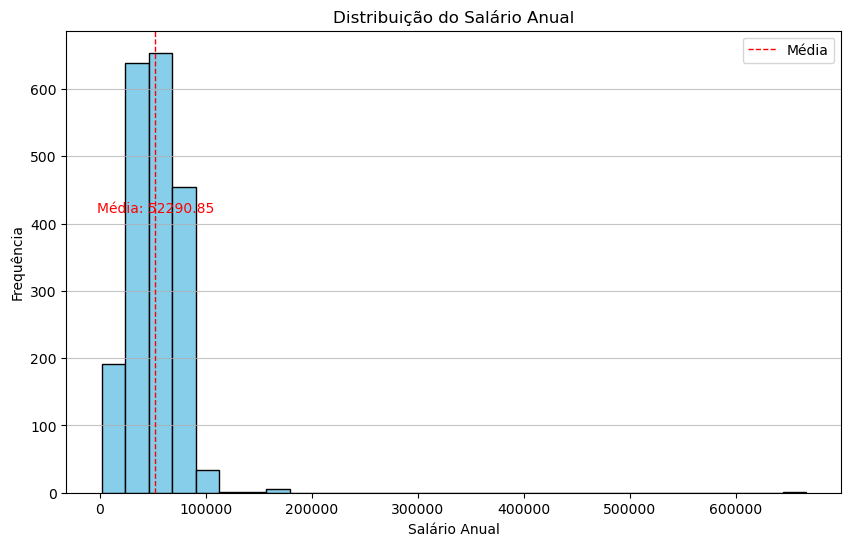

In [8]:
# Analisando a coluna 'Salario Anual'.
# Calcular a média
mean_salary = df['Salario Anual'].mean()

# Criar um histograma para a variável 'Salario Anual'
plt.figure(figsize=(10, 6))
plt.hist(df['Salario Anual'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Salário Anual')
plt.xlabel('Salário Anual')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

# Adicionar linha da média
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1, label='Média')

# Adicionar texto da média com ajuste de posição
plt.text(mean_salary, plt.ylim()[1] * 0.6, f'Média: {mean_salary:.2f}', 
         color='red', ha='center', va='bottom')

plt.legend()
plt.show()


In [9]:
# Função para verificar a existencia de Outliers
def verificar_outliers(df, coluna, id_coluna):
    # Calculando o IQR (Intervalo Interquartil)
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo limites inferiores e superiores
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    # Retornando o ID e os valores outliers
    if not outliers.empty:
        return outliers[[id_coluna, coluna]]
    else:
        return "Não há outliers."



In [10]:
#Chamando a função verificar.
salario = 'Salario Anual'
verificar_outliers(df,salario,'ID')

,ID,Salario Anual
325,4931,157146.0
497,1501,160803.0
527,9432,666666.0
731,1503,162397.0
853,5336,157733.0
1826,5555,153924.0
1925,11181,156924.0


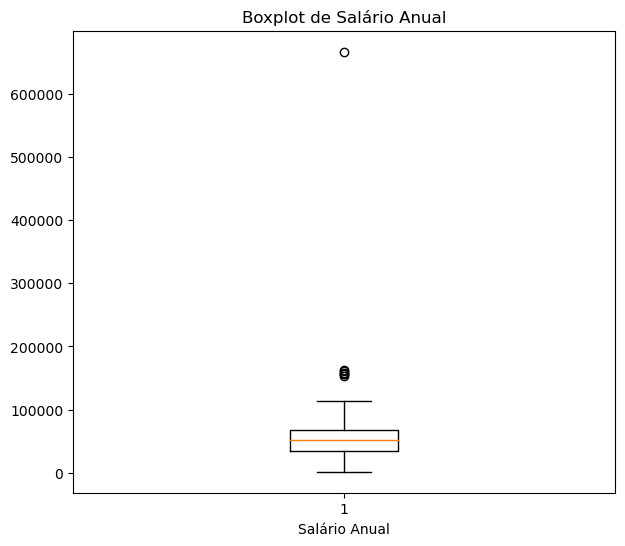

In [11]:
# Confirmando os valores Outliers na variável (Salário Anual)!

plt.figure(figsize=(7, 6))  # Aumentando o tamanho da figura (largura, altura)
plt.boxplot(df['Salario Anual'].dropna(),widths=0.2)
plt.title('Boxplot de Salário Anual')
plt.xlabel('Salário Anual')
plt.show()


In [12]:
# Função para remover os valores Outliers.

def remover_outliers(df, coluna):
    # Contagem de linhas antes da remoção de outliers
    linhas_antes = df.shape[0]

    # Calculando o IQR (Intervalo Interquartil)
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo limites inferiores e superiores
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.2 * IQR

    # Removendo os outliers
    df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

    # Contagem de linhas depois da remoção de outliers
    linhas_depois = df_sem_outliers.shape[0]

    # Exibindo as informações
    print(f'Total de linhas antes da remoção de outliers: {linhas_antes}')
    print(f'Total de linhas depois da remoção de outliers: {linhas_depois}')

    # Retornando o DataFrame sem os outliers
    return df_sem_outliers



In [13]:
# Removendo Outliers.

salario = 'Salario Anual'
df = remover_outliers(df, salario)



Total de linhas antes da remoção de outliers: 2000
Total de linhas depois da remoção de outliers: 1973


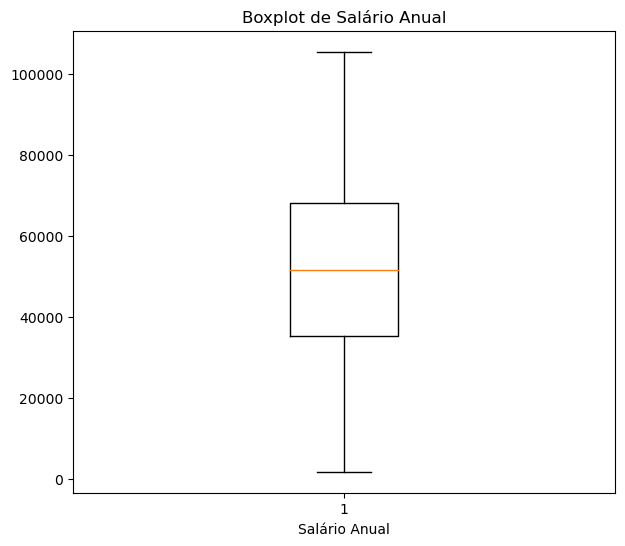

In [14]:
# Checando!

plt.figure(figsize=(7, 6))  # Aumentando o tamanho da figura (largura, altura)
plt.boxplot(df['Salario Anual'].dropna(),widths=0.2)
plt.title('Boxplot de Salário Anual')
plt.xlabel('Salário Anual')
plt.show()


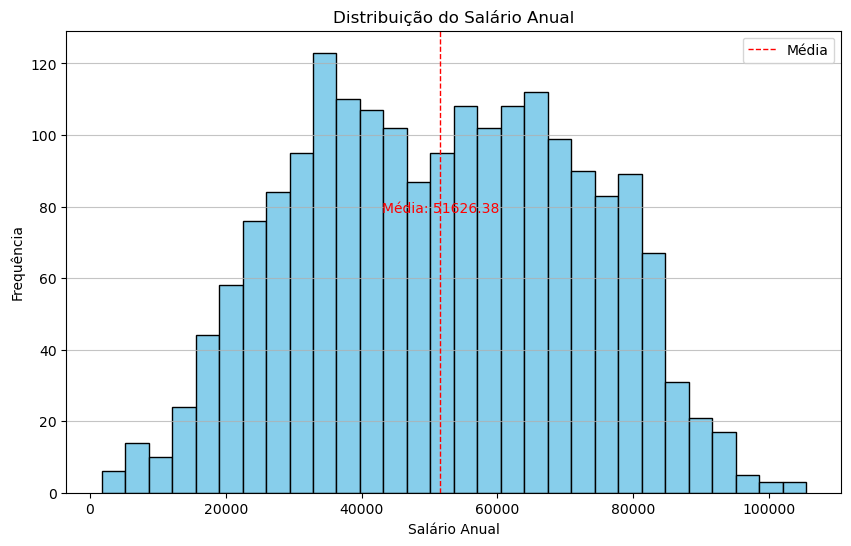

In [15]:
# Calcular a média}
mean_salary = df['Salario Anual'].mean()

# Criar um histograma para a variável 'Salario Anual'
plt.figure(figsize=(10, 6))
plt.hist(df['Salario Anual'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Salário Anual')
plt.xlabel('Salário Anual')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

# Adicionar linha da média
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1, label='Média')

# Adicionar texto da média com ajuste de posição
plt.text(mean_salary, plt.ylim()[1] * 0.6, f'Média: {mean_salary:.2f}', 
         color='red', ha='center', va='bottom')

plt.legend()
plt.show()


> Como podemos ver não existe mais Outlier, o gráfico sugere que a distribuição de salários é relativamente equilibrada em torno da média de 51.626,38, com uma grande parte da população ganhando entre 30.000 e 70.000. 

In [16]:
# Verificando Outliers na coluna 'Gasto com Eletronicos'
gas_eletronico = 'Gasto com Eletronicos'
verificar_outliers(df,gas_eletronico,'ID')

,ID,Gasto com Eletronicos
35,7962,1285
38,3725,1248
77,7919,1285
152,8545,1296
196,3009,1462
222,5547,1478
223,8362,1478
376,10133,1302
402,7999,1239
472,9260,1349


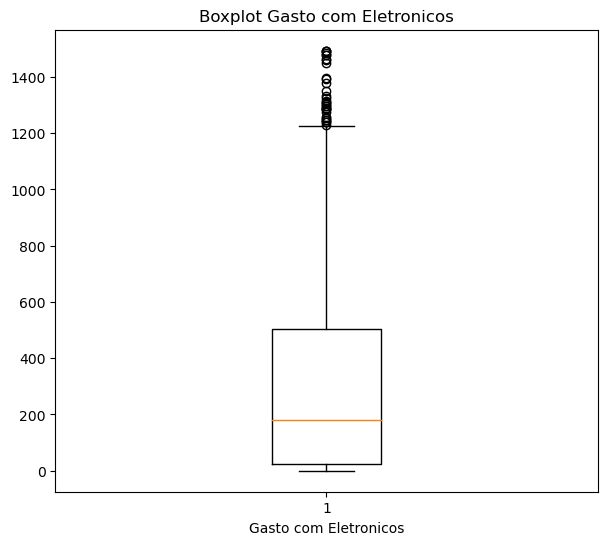

In [17]:
# Visualizando no boxplot.
plt.figure(figsize=(7, 6))  # Aumentando o tamanho da figura (largura, altura)
plt.boxplot(df['Gasto com Eletronicos'].dropna(),widths=0.2)
plt.title('Boxplot Gasto com Eletronicos')
plt.xlabel('Gasto com Eletronicos')
plt.show()


In [18]:
# Removendo Outliers.
df = remover_outliers(df, gas_eletronico)

Total de linhas antes da remoção de outliers: 1973
Total de linhas depois da remoção de outliers: 1902


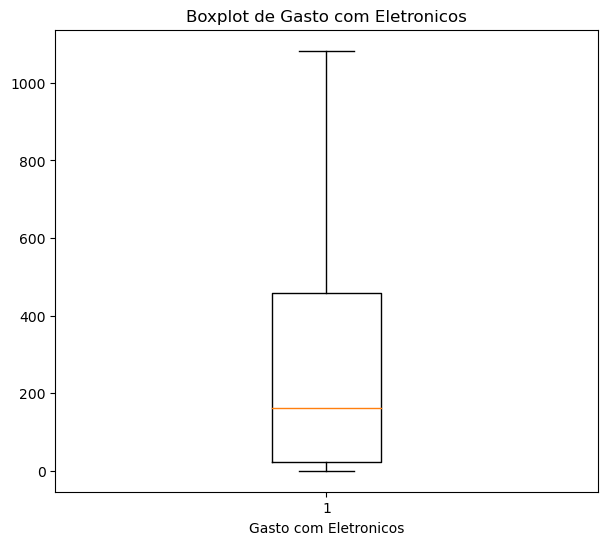

In [19]:
# Checando!

plt.figure(figsize=(7, 6))  # Aumentando o tamanho da figura (largura, altura)
plt.boxplot(df['Gasto com Eletronicos'].dropna(),widths=0.2)
plt.title('Boxplot de Gasto com Eletronicos')
plt.xlabel('Gasto com Eletronicos')
plt.show()


In [20]:
df.shape

(1902, 28)

In [21]:
# Verificando Outliers na coluna 'Gasto com Eletronicos'
verificar_outliers(df,gas_eletronico,'ID')

'Não há outliers.'

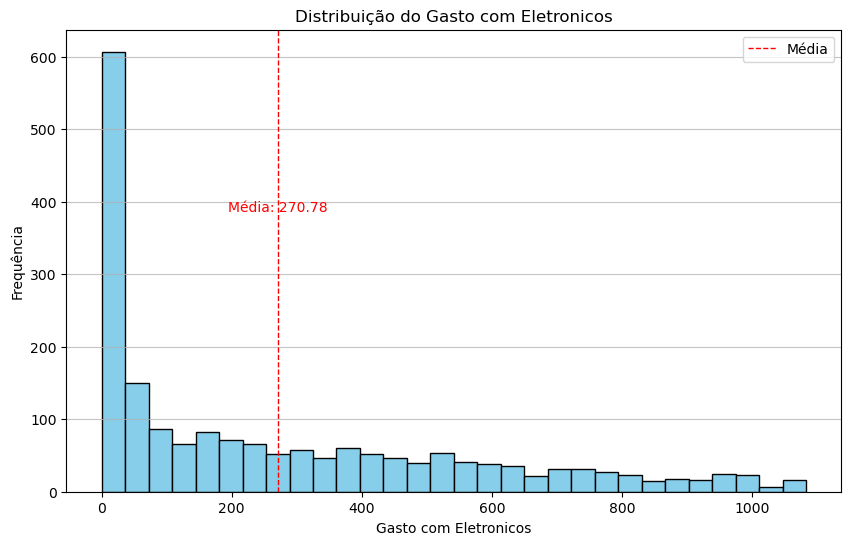

In [22]:
# Calcular a média
mean_salary = df['Gasto com Eletronicos'].mean()

# Criar um histograma para a variável 'Salario Anual'
plt.figure(figsize=(10, 6))
plt.hist(df['Gasto com Eletronicos'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Gasto com Eletronicos')
plt.xlabel('Gasto com Eletronicos')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

# Adicionar linha da média
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1, label='Média')

# Adicionar texto da média com ajuste de posição
plt.text(mean_salary, plt.ylim()[1] * 0.6, f'Média: {mean_salary:.2f}', 
         color='red', ha='center', va='bottom')

plt.legend()
plt.show()


> Os clientes gastam em média 268,83 reais com eletrônicos, com um pico alto também na faixa de 1 há 100 reais, provavelmente com eletrônicos mais baratos.A maioria dos clientes gasta menos em eletrônicos (conforme visto no pico à esquerda), mas há uma dispersão significativa de clientes que gastam valores maiores.

In [23]:
# Verificando na variável 'Idade'
idade = 'Idade'
verificar_outliers(df,idade,'ID')


,ID,Idade
513,11004,131
827,1150,125


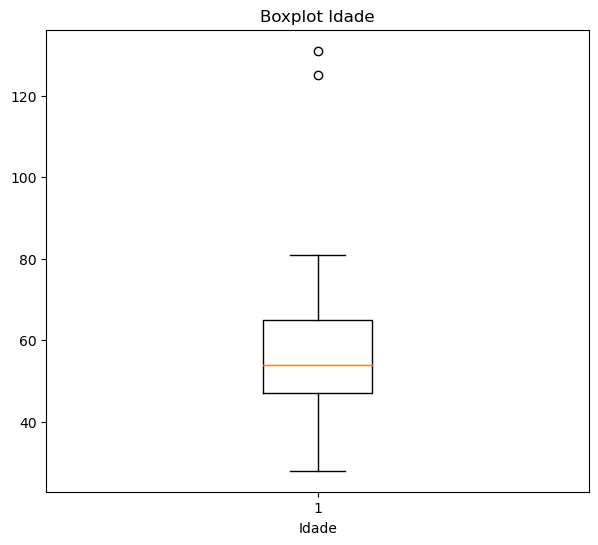

In [24]:
# Chegando!
plt.figure(figsize=(7, 6))  # Aumentando o tamanho da figura (largura, altura)
plt.boxplot(df['Idade'].dropna(),widths=0.2)
plt.title('Boxplot Idade')
plt.xlabel('Idade')
plt.show()


In [25]:
df = remover_outliers(df, idade)

Total de linhas antes da remoção de outliers: 1902
Total de linhas depois da remoção de outliers: 1900


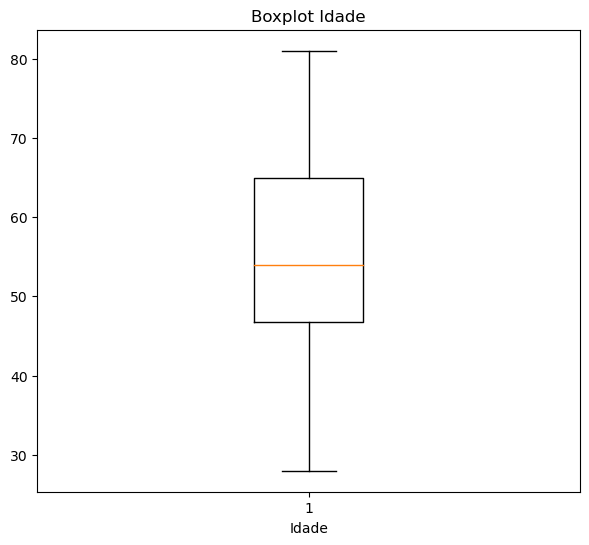

In [26]:
# Chegando!
plt.figure(figsize=(7, 6))  # Aumentando o tamanho da figura (largura, altura)
plt.boxplot(df['Idade'].dropna(),widths=0.2)
plt.title('Boxplot Idade')
plt.xlabel('Idade')
plt.show()


In [27]:
#Comfirmando Se há Outliers.
verificar_outliers(df,idade,'ID')

'Não há outliers.'

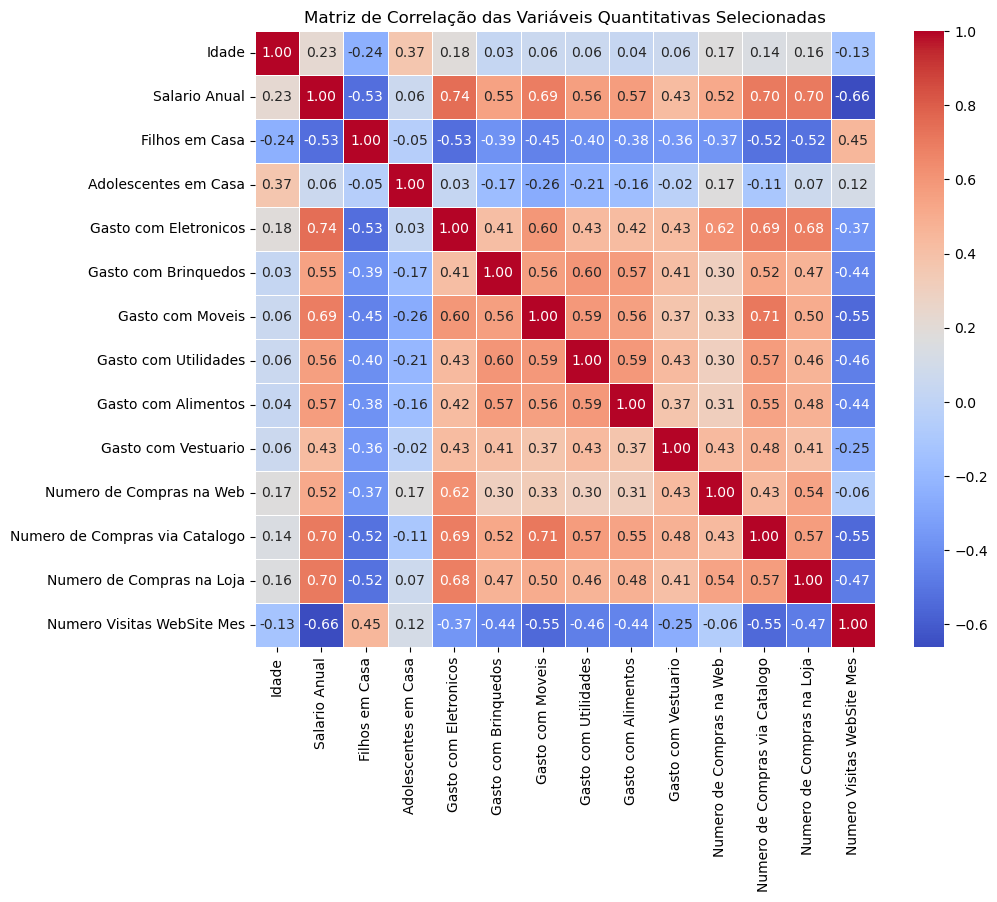

In [28]:
# Lista das variáveis quantitativas fornecidas
variaveis_quantitativas = ['Idade','Salario Anual','Filhos em Casa','Adolescentes em Casa','Gasto com Eletronicos','Gasto com Brinquedos','Gasto com Moveis','Gasto com Utilidades','Gasto com Alimentos','Gasto com Vestuario',
'Numero de Compras na Web','Numero de Compras via Catalogo','Numero de Compras na Loja','Numero Visitas WebSite Mes']

# Filtrando o DataFrame apenas com essas colunas
df_selecionado = df[variaveis_quantitativas]

# Calculando a matriz de correlação
correlacao = df_selecionado.corr()

# Criando o gráfico de correlação (heatmap)
plt.figure(figsize=(10, 8))  # Tamanho do gráfico
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Quantitativas Selecionadas')
plt.show()


> Há duas correlações notáveis nos dados: o gasto com eletrônicos está fortemente relacionado às compras realizadas pela web, enquanto o gasto com móveis apresenta uma correlação significativa com as compras via catálogo.

### Tratamento de Dados

In [29]:
# Convertendo a coluna 'Data Cadastro' para datetime usando .loc
df.loc[:, 'Data Cadastro'] = pd.to_datetime(df['Data Cadastro'], errors='coerce')

df['Data Cadastro'].info()

<class 'pandas.core.series.Series'>
Index: 1900 entries, 0 to 1999
Series name: Data Cadastro
Non-Null Count  Dtype 
--------------  ----- 
1900 non-null   object
dtypes: object(1)
memory usage: 29.7+ KB


* Como a coluna não está convertendo para o tipo datetime eu irei criar uma nova coluna.


In [30]:
# Garantir que estamos modificando o DataFrame corretamente usando .loc
df.loc[:, 'Data Cadastro Convertido'] = pd.to_datetime(df['Data Cadastro'], errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(df['Data Cadastro Convertido'].dtype)


datetime64[ns]


In [31]:
df['Data Cadastro Convertido'].info()

<class 'pandas.core.series.Series'>
Index: 1900 entries, 0 to 1999
Series name: Data Cadastro Convertido
Non-Null Count  Dtype         
--------------  -----         
1900 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 29.7 KB


In [32]:
# Exlcuindo a coluna Data Cadastro.
df = df.drop(columns=['Data Cadastro'])

* Agora como os dados estão no formato para análise, iremos começar a visualizar as distribuições:

In [33]:
# Verificando as colunas.
list(df.columns)

['ID',
 'Ano Nascimento',
 'Idade',
 'Escolaridade',
 'Estado Civil',
 'Salario Anual',
 'Filhos em Casa',
 'Adolescentes em Casa',
 'Dias Desde Ultima Compra',
 'Gasto com Eletronicos',
 'Gasto com Brinquedos',
 'Gasto com Moveis',
 'Gasto com Utilidades',
 'Gasto com Alimentos',
 'Gasto com Vestuario',
 'Numero de Compras com Desconto',
 'Numero de Compras na Web',
 'Numero de Compras via Catalogo',
 'Numero de Compras na Loja',
 'Numero Visitas WebSite Mes',
 'Compra na Campanha 1',
 'Compra na Campanha 2',
 'Compra na Campanha 3',
 'Compra na Campanha 4',
 'Compra na Campanha 5',
 'Comprou',
 'Pais',
 'Data Cadastro Convertido']

### Análisando as distribuições das Compras nas Campanhas

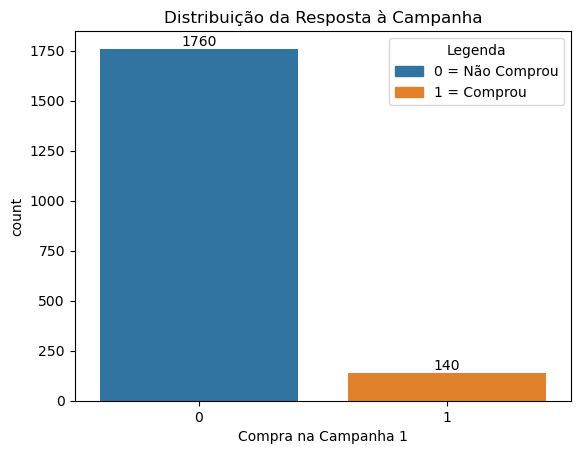

In [34]:
# Criar o gráfico de barras
ax = sns.countplot(x='Compra na Campanha 1', data=df)
plt.title('Distribuição da Resposta à Campanha')

# Adicionar os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Adicionar a legenda com as cores das barras
handles = [Patch(color=ax.patches[0].get_facecolor(), label='0 = Não Comprou'),
           Patch(color=ax.patches[1].get_facecolor(), label='1 = Comprou')]
ax.legend(handles=handles, loc='upper right', title='Legenda')

plt.show()


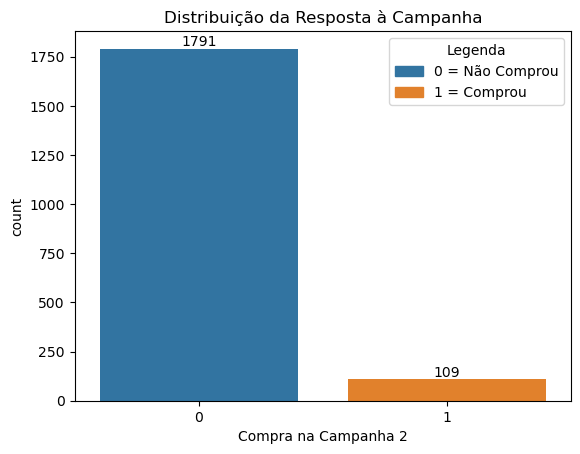

In [35]:
# Criar o gráfico de barras
ax = sns.countplot(x='Compra na Campanha 2', data=df)
plt.title('Distribuição da Resposta à Campanha')

# Adicionar os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Adicionar a legenda com as cores das barras
handles = [Patch(color=ax.patches[0].get_facecolor(), label='0 = Não Comprou'),
           Patch(color=ax.patches[1].get_facecolor(), label='1 = Comprou')]
ax.legend(handles=handles, loc='upper right', title='Legenda')

plt.show()


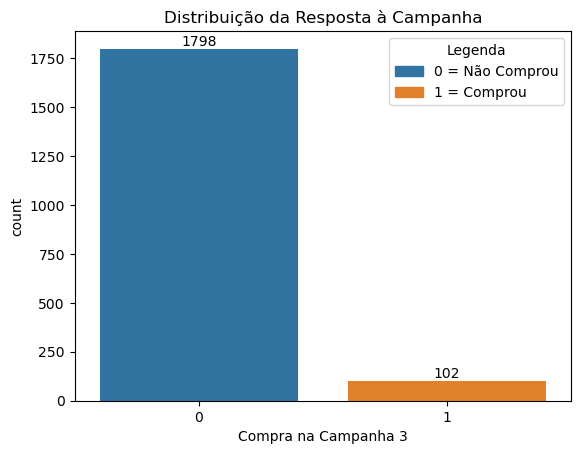

In [36]:
# Criar o gráfico de barras
ax = sns.countplot(x='Compra na Campanha 3', data=df)
plt.title('Distribuição da Resposta à Campanha')

# Adicionar os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Adicionar a legenda com as cores das barras
handles = [Patch(color=ax.patches[0].get_facecolor(), label='0 = Não Comprou'),
           Patch(color=ax.patches[1].get_facecolor(), label='1 = Comprou')]
ax.legend(handles=handles, loc='upper right', title='Legenda')

plt.show()


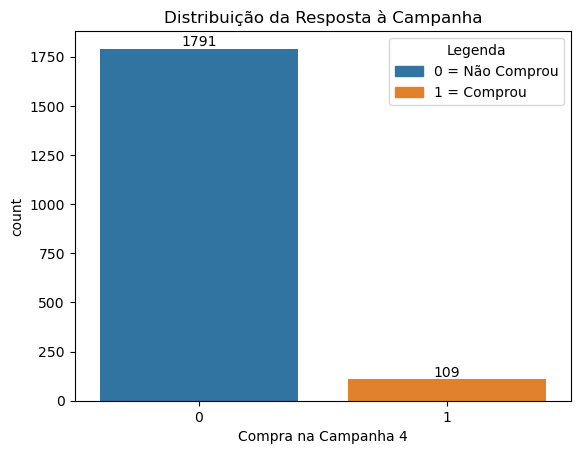

In [37]:
# Criar o gráfico de barras
ax = sns.countplot(x='Compra na Campanha 4', data=df)
plt.title('Distribuição da Resposta à Campanha')

# Adicionar os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Adicionar a legenda com as cores das barras
handles = [Patch(color=ax.patches[0].get_facecolor(), label='0 = Não Comprou'),
           Patch(color=ax.patches[1].get_facecolor(), label='1 = Comprou')]
ax.legend(handles=handles, loc='upper right', title='Legenda')

plt.show()


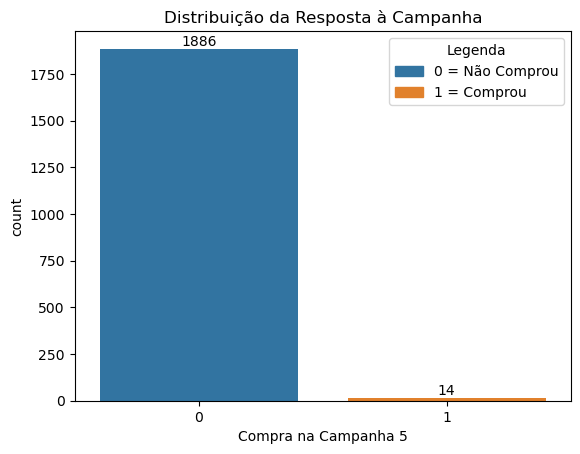

In [38]:
# Criar o gráfico de barras
ax = sns.countplot(x='Compra na Campanha 5', data=df)
plt.title('Distribuição da Resposta à Campanha')

# Adicionar os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Adicionar a legenda com as cores das barras
handles = [Patch(color=ax.patches[0].get_facecolor(), label='0 = Não Comprou'),
           Patch(color=ax.patches[1].get_facecolor(), label='1 = Comprou')]
ax.legend(handles=handles, loc='upper right', title='Legenda')

plt.show()


**Nenhuma das 5 campanhas de marketing foi bem-sucedida, uma vez que a maioria dos clientes não realizou compras durante essas campanhas. Esse resultado sugere que a estratégia utilizada não gerou o engajamento esperado, e uma revisão nas abordagens pode ser necessária para aumentar a conversão em futuras campanhas.**

### Analisando as informações de idade, escolaridade e estado civil, buscando insights valiosos que possam auxiliar a equipe de marketing na criação de estratégias mais eficazes.

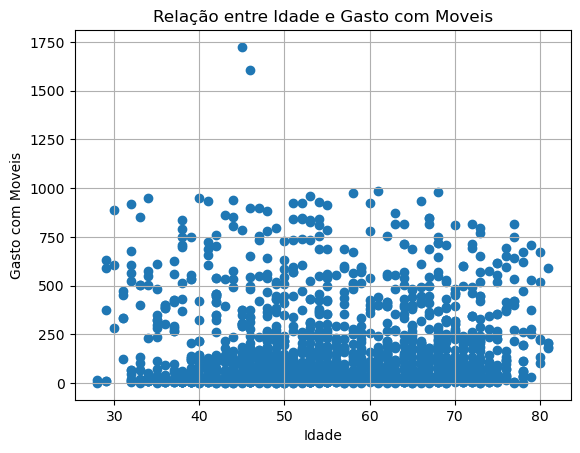

In [39]:
# Criando o gráfico de dispersão (scatter plot) para visualizar a relação entre idade e gasto com móveis
plt.scatter(df['Idade'], df['Gasto com Moveis'])
plt.title('Relação entre Idade e Gasto com Moveis')
plt.xlabel('Idade')
plt.ylabel('Gasto com Moveis')
plt.grid(True)

# Mostrar o gráfico
plt.show()

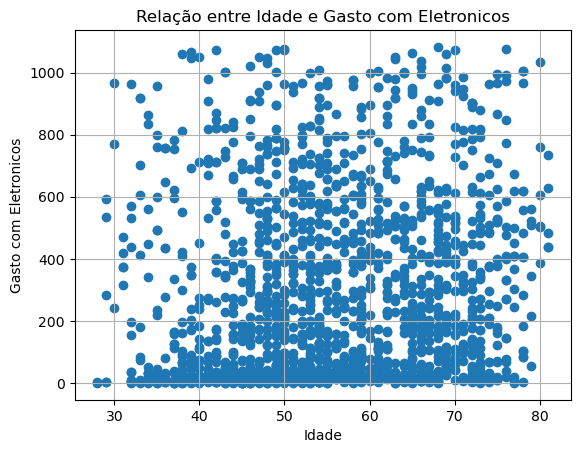

In [40]:
# Criando o gráfico de dispersão (scatter plot) para visualizar a relação entre idade e gasto com móveis
plt.scatter(df['Idade'], df['Gasto com Eletronicos'])
plt.title('Relação entre Idade e Gasto com Eletronicos')
plt.xlabel('Idade')
plt.ylabel('Gasto com Eletronicos')
plt.grid(True)

# Mostrar o gráfico
plt.show()

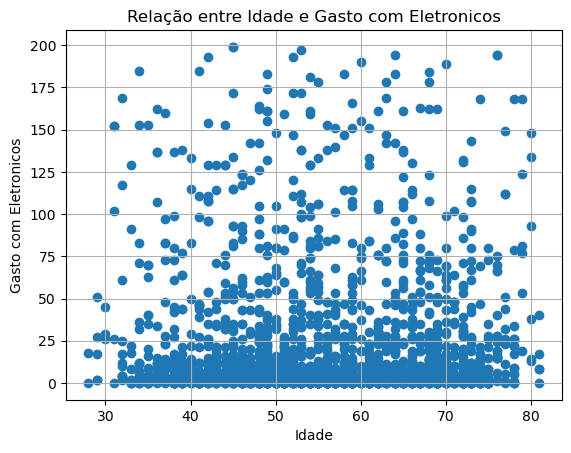

In [41]:
# Criando o gráfico de dispersão (scatter plot) para visualizar a relação entre idade e gasto com móveis
plt.scatter(df['Idade'], df['Gasto com Brinquedos'])
plt.title('Relação entre Idade e Gasto com Eletronicos')
plt.xlabel('Idade')
plt.ylabel('Gasto com Eletronicos')
plt.grid(True)

# Mostrar o gráfico
plt.show()

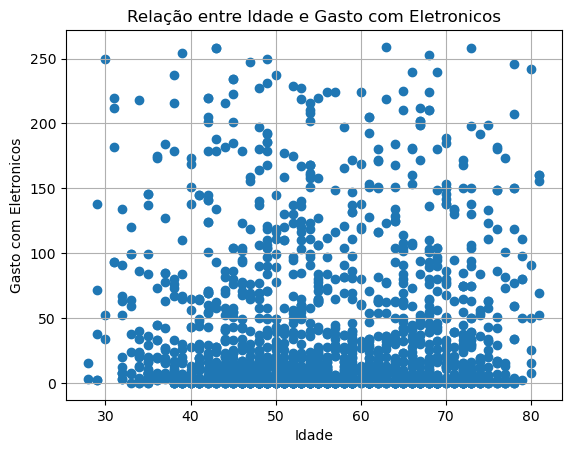

In [42]:
# Criando o gráfico de dispersão (scatter plot) para visualizar a relação entre idade e gasto com móveis
plt.scatter(df['Idade'], df['Gasto com Utilidades'])
plt.title('Relação entre Idade e Gasto com Eletronicos')
plt.xlabel('Idade')
plt.ylabel('Gasto com Eletronicos')
plt.grid(True)

# Mostrar o gráfico
plt.show()

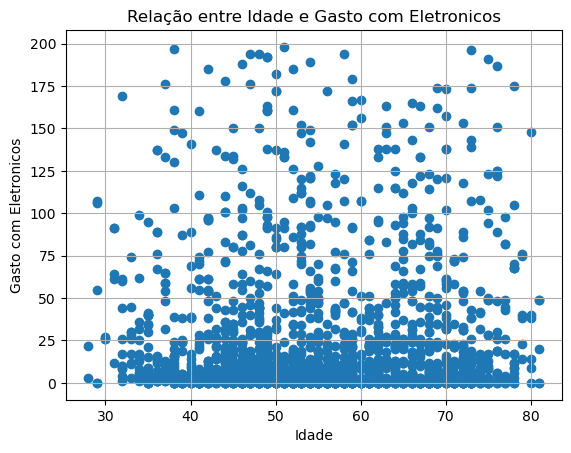

In [43]:
# Criando o gráfico de dispersão (scatter plot) para visualizar a relação entre idade e gasto com móveis
plt.scatter(df['Idade'], df['Gasto com Alimentos'])
plt.title('Relação entre Idade e Gasto com Eletronicos')
plt.xlabel('Idade')
plt.ylabel('Gasto com Eletronicos')
plt.grid(True)

# Mostrar o gráfico
plt.show()

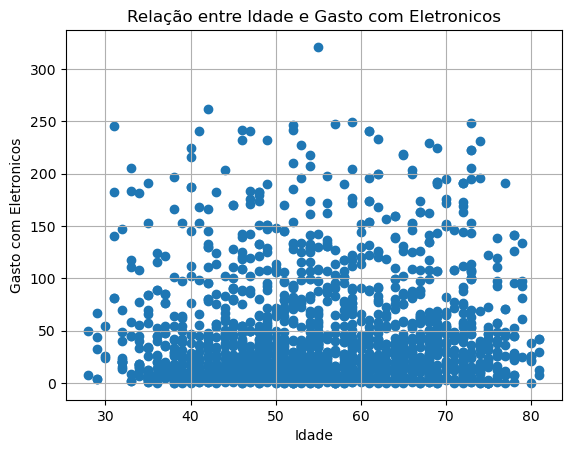

In [44]:
# Criando o gráfico de dispersão (scatter plot) para visualizar a relação entre idade e gasto com móveis
plt.scatter(df['Idade'], df['Gasto com Vestuario'])
plt.title('Relação entre Idade e Gasto com Eletronicos')
plt.xlabel('Idade')
plt.ylabel('Gasto com Eletronicos')
plt.grid(True)

# Mostrar o gráfico
plt.show()

> Analisando os gráficos, não há uma tendência clara de que a idade interfira nos valores gastos em diferentes categorias.

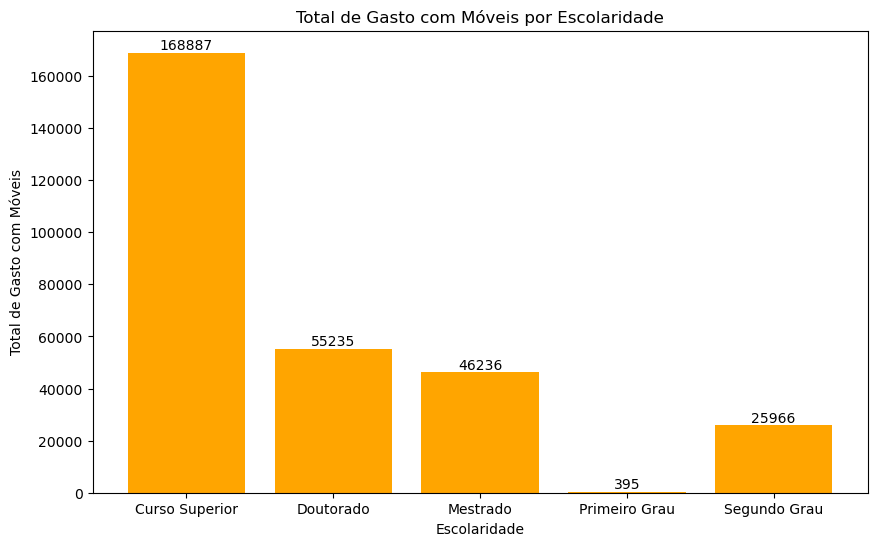

In [45]:
# Calcular o total de gasto com móveis por escolaridade
escolaridade_vs_moveis_total = df.groupby('Escolaridade')['Gasto com Moveis'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com móveis
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com móveis por escolaridade
bars = plt.bar(escolaridade_vs_moveis_total['Escolaridade'], escolaridade_vs_moveis_total['Gasto com Moveis'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Total de Gasto com Móveis')
plt.title('Total de Gasto com Móveis por Escolaridade')

# Exibir o gráfico
plt.show()


**Clientes com curso superior têm os maiores gastos com moveis em comparação aos outros níveis de escolaridade. Por outro lado, aqueles com primeiro grau apresentam os menores gastos, quase insignificantes em relação aos demais grupos educacionais.**

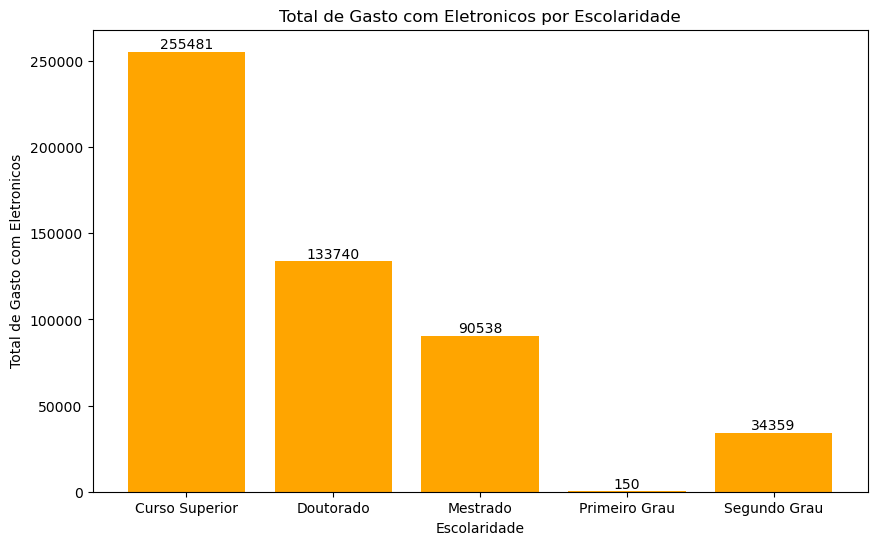

In [46]:
# Calcular o total de gasto com Eletronicos por escolaridade
escolaridade_vs_moveis_total = df.groupby('Escolaridade')['Gasto com Eletronicos'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Eletronicos
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Eletronicos por escolaridade
bars = plt.bar(escolaridade_vs_moveis_total['Escolaridade'], escolaridade_vs_moveis_total['Gasto com Eletronicos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Total de Gasto com Eletronicos')
plt.title('Total de Gasto com Eletronicos por Escolaridade')

# Exibir o gráfico
plt.show()


**Clientes com nível de escolaridade superior apresentam os maiores gastos com eletrônicos, enquanto aqueles com primeiro grau têm o menor gasto entre todos os níveis educacionais.**

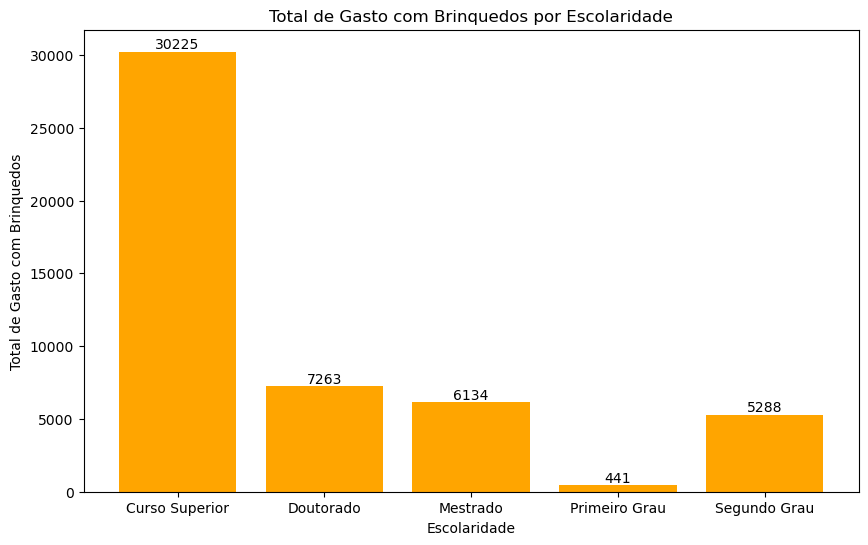

In [47]:
# Calcular o total de gasto com Brinquedos por escolaridade
escolaridade_vs_moveis_total = df.groupby('Escolaridade')['Gasto com Brinquedos'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Brinquedos
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Brinquedos por escolaridade
bars = plt.bar(escolaridade_vs_moveis_total['Escolaridade'], escolaridade_vs_moveis_total['Gasto com Brinquedos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Total de Gasto com Brinquedos')
plt.title('Total de Gasto com Brinquedos por Escolaridade')

# Exibir o gráfico
plt.show()


**Clientes com curso superior segue gastando mais com brinquedos também.**

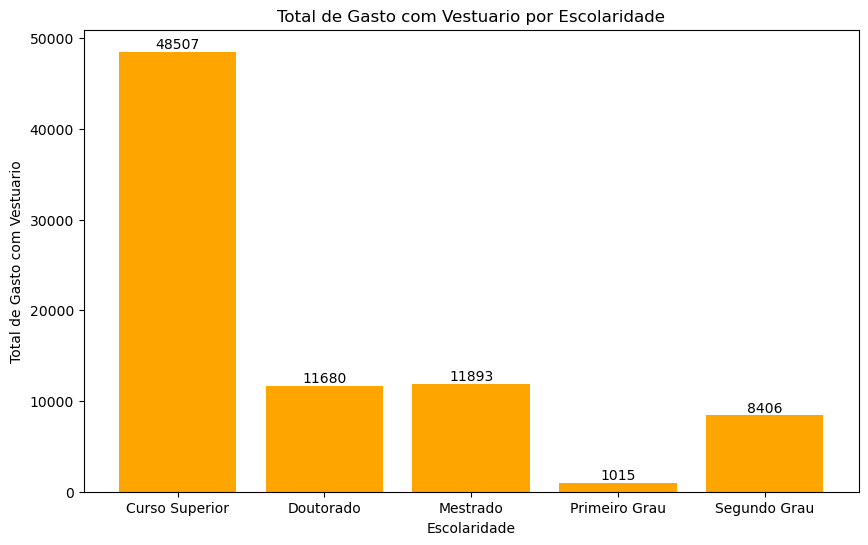

In [48]:
# Calcular o total de gasto com Vestuario por escolaridade
escolaridade_vs_moveis_total = df.groupby('Escolaridade')['Gasto com Vestuario'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Vestuario
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Vestuario por escolaridade
bars = plt.bar(escolaridade_vs_moveis_total['Escolaridade'], escolaridade_vs_moveis_total['Gasto com Vestuario'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Total de Gasto com Vestuario')
plt.title('Total de Gasto com Vestuario por Escolaridade')

# Exibir o gráfico
plt.show()


**Clientes com curso superior gastando mais com vestuario.**

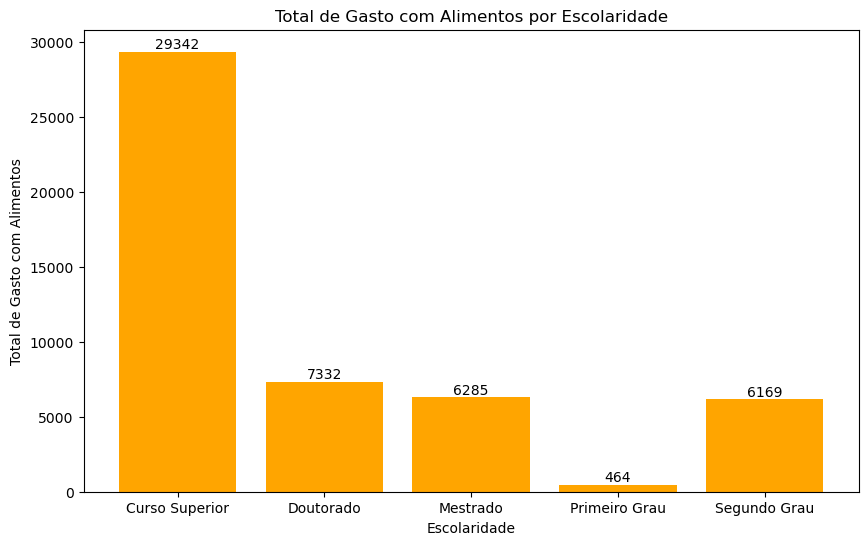

In [49]:
# Agora que os dados foram recarregados, vamos criar o gráfico de barras corretamente com base no arquivo mais recente, usando as variáveis Escolaridade e Gasto com Móveis.

# Calcular o total de gasto com Alimentos por escolaridade
escolaridade_vs_moveis_total = df.groupby('Escolaridade')['Gasto com Alimentos'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Alimentos
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Alimentos por escolaridade
bars = plt.bar(escolaridade_vs_moveis_total['Escolaridade'], escolaridade_vs_moveis_total['Gasto com Alimentos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Total de Gasto com Alimentos')
plt.title('Total de Gasto com Alimentos por Escolaridade')

# Exibir o gráfico
plt.show()


**Clientes com curso superior segue gastando mais com alimentos.**

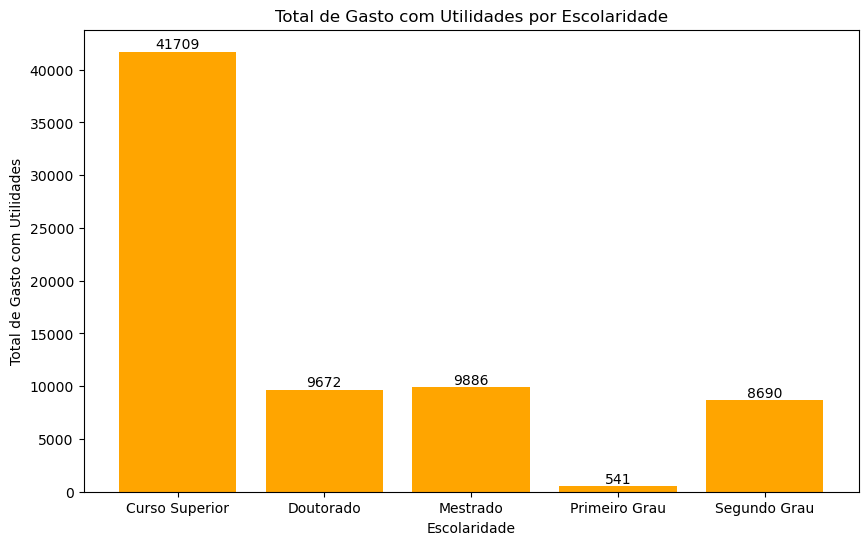

In [50]:
# Calcular o total de gasto com Utilidades por escolaridade
escolaridade_vs_moveis_total = df.groupby('Escolaridade')['Gasto com Utilidades'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Utilidades
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Utilidades por escolaridade
bars = plt.bar(escolaridade_vs_moveis_total['Escolaridade'], escolaridade_vs_moveis_total['Gasto com Utilidades'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Total de Gasto com Utilidades')
plt.title('Total de Gasto com Utilidades por Escolaridade')

# Exibir o gráfico
plt.show()


**Analisando todos os gráficos, identificamos um aumento significativo nos gastos em relação ao nível de escolaridade, com uma clara tendência de maiores despesas entre clientes com ensino superior, gastando mais em todas as 6 categorias.**


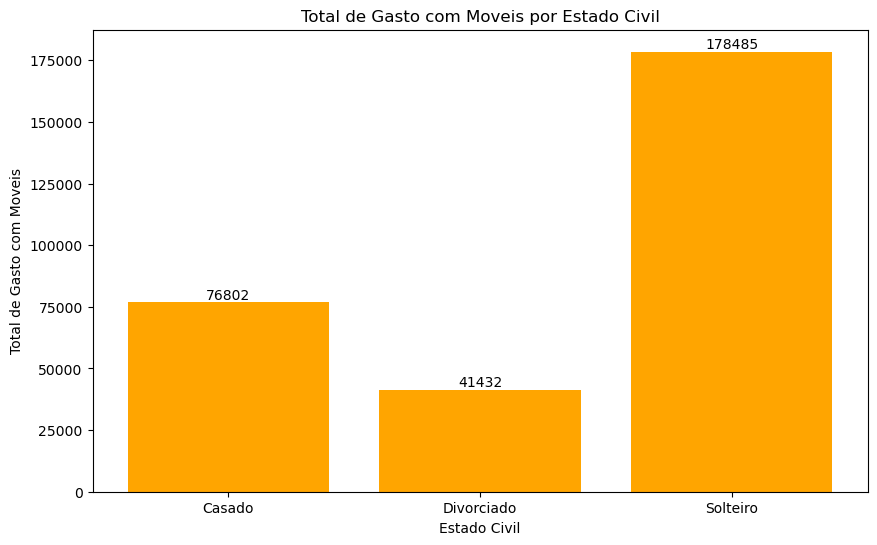

In [51]:
# Calcular o total de gasto com móveis por Estado civil
escolaridade_vs_moveis_total = df.groupby('Estado Civil')['Gasto com Moveis'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com móveis
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com móveis por Estado civil.
bars = plt.bar(escolaridade_vs_moveis_total['Estado Civil'], escolaridade_vs_moveis_total['Gasto com Moveis'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Estado Civil')
plt.ylabel('Total de Gasto com Moveis')
plt.title('Total de Gasto com Moveis por Estado Civil')

# Exibir o gráfico
plt.show()


**Clientes que são solteiro tem um maior gasto com moveis**

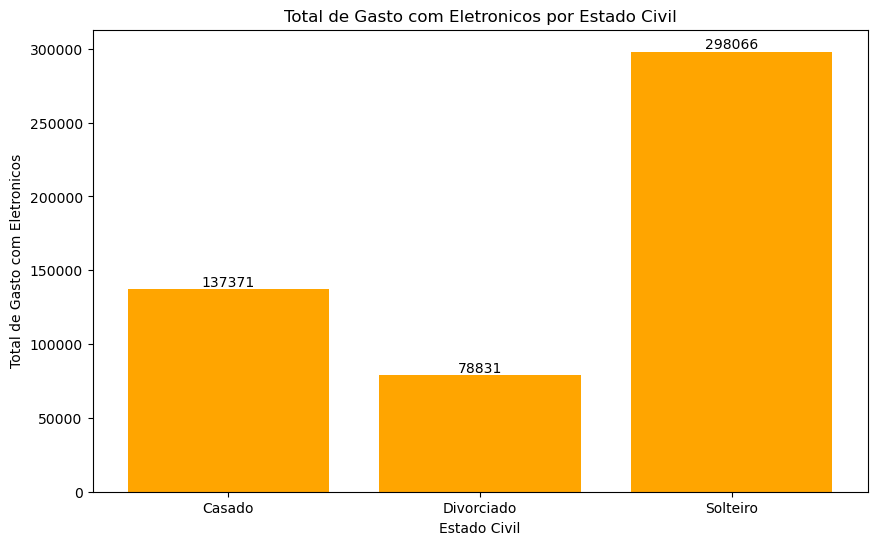

In [52]:
# Calcular o total de gasto com Eletronicos por Estado civil
escolaridade_vs_moveis_total = df.groupby('Estado Civil')['Gasto com Eletronicos'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Eletronicos
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Eletronicos por Estado civil.
bars = plt.bar(escolaridade_vs_moveis_total['Estado Civil'], escolaridade_vs_moveis_total['Gasto com Eletronicos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Estado Civil')
plt.ylabel('Total de Gasto com Eletronicos')
plt.title('Total de Gasto com Eletronicos por Estado Civil')

# Exibir o gráfico
plt.show()


**Clientes que são solteiro tem um maior gasto com eletronicos.**

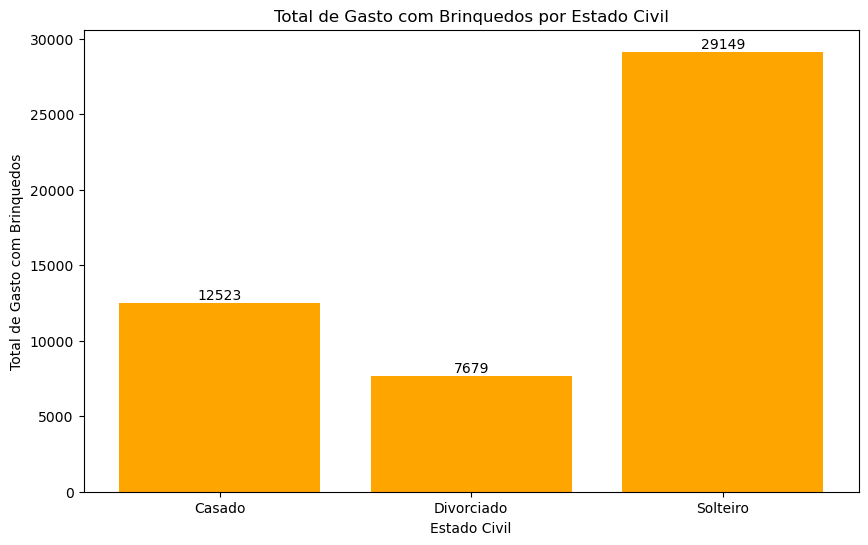

In [53]:
# Calcular o total de gasto com Brinquedos por Estado civil
escolaridade_vs_moveis_total = df.groupby('Estado Civil')['Gasto com Brinquedos'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Brinquedos
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Brinquedos por Estado civil.
bars = plt.bar(escolaridade_vs_moveis_total['Estado Civil'], escolaridade_vs_moveis_total['Gasto com Brinquedos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Estado Civil')
plt.ylabel('Total de Gasto com Brinquedos')
plt.title('Total de Gasto com Brinquedos por Estado Civil')

# Exibir o gráfico
plt.show()


**Clientes que são solteiro tem um maior gasto com brinquedos.**

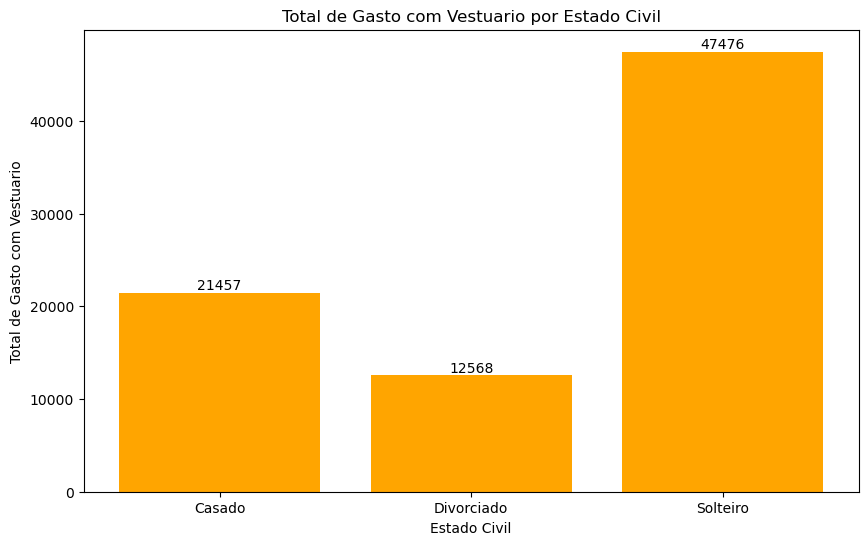

In [54]:
# Calcular o total de gasto com Vestuario por Estado civil
escolaridade_vs_moveis_total = df.groupby('Estado Civil')['Gasto com Vestuario'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Vestuario
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Vestuario por Estado civil.
bars = plt.bar(escolaridade_vs_moveis_total['Estado Civil'], escolaridade_vs_moveis_total['Gasto com Vestuario'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Estado Civil')
plt.ylabel('Total de Gasto com Vestuario')
plt.title('Total de Gasto com Vestuario por Estado Civil')

# Exibir o gráfico
plt.show()


**Clientes que sao solteiro gastam mais com vestuario.**

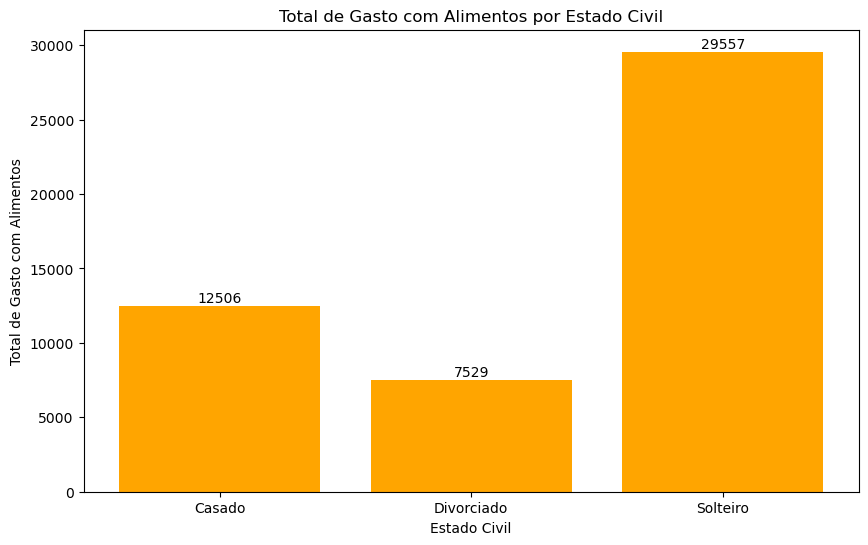

In [55]:
# Calcular o total de gasto com Alimentos por Estado civil
escolaridade_vs_moveis_total = df.groupby('Estado Civil')['Gasto com Alimentos'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Alimentos
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Alimentos por Estado civil.
bars = plt.bar(escolaridade_vs_moveis_total['Estado Civil'], escolaridade_vs_moveis_total['Gasto com Alimentos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Estado Civil')
plt.ylabel('Total de Gasto com Alimentos')
plt.title('Total de Gasto com Alimentos por Estado Civil')

# Exibir o gráfico
plt.show()


**Clientes que são solteiro tem um maior gasto com alimentos.**

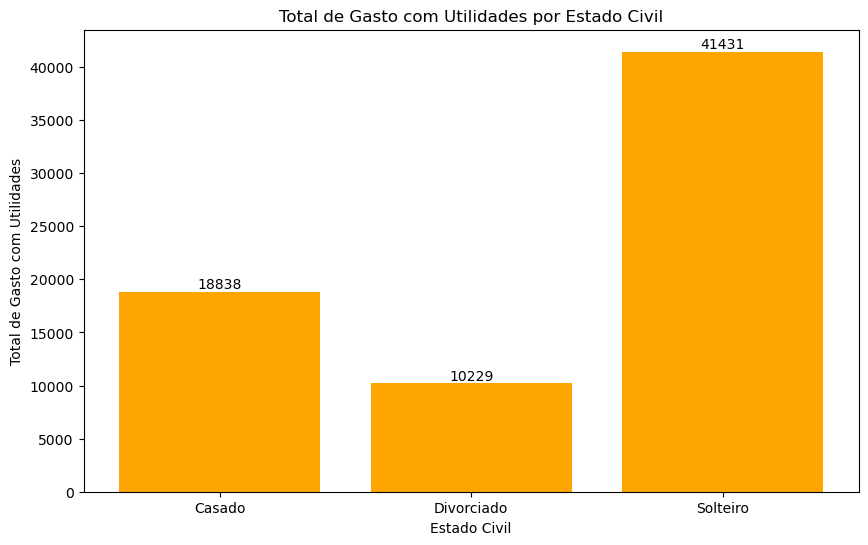

In [56]:
# Calcular o total de gasto com Utilidades por Estado civil
escolaridade_vs_moveis_total = df.groupby('Estado Civil')['Gasto com Utilidades'].sum().reset_index()

# Criar o gráfico de barras com o total correto de gasto com Utilidades
plt.figure(figsize=(10, 6))

# Criar as barras com os dados corretos de total de gasto com Utilidades por Estado civil.
bars = plt.bar(escolaridade_vs_moveis_total['Estado Civil'], escolaridade_vs_moveis_total['Gasto com Utilidades'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total correto
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Estado Civil')
plt.ylabel('Total de Gasto com Utilidades')
plt.title('Total de Gasto com Utilidades por Estado Civil')

# Exibir o gráfico
plt.show()


> **Verificando todos os gráficos, observamos uma clara tendência de que clientes solteiros gastam mais em diversas categorias.**

# Qual o total gasto com Eletronicos quando o cliente tem filhos em casa ?

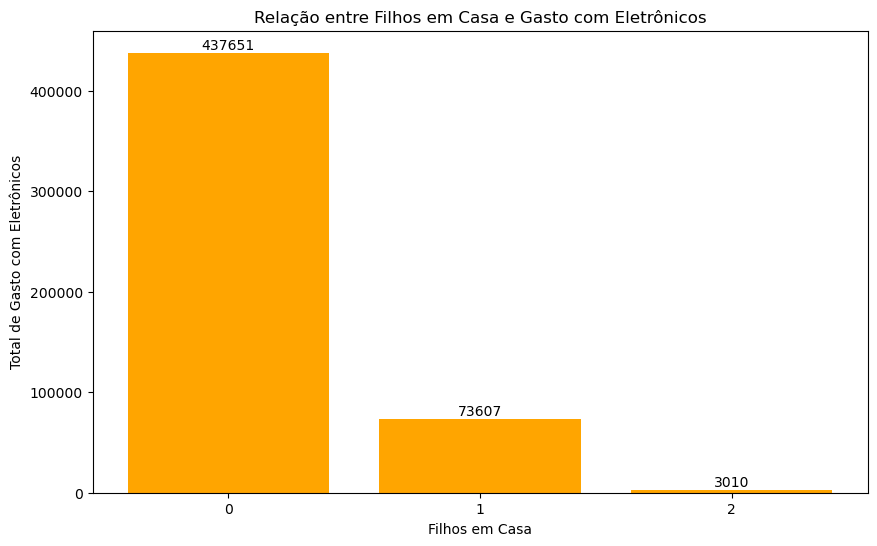

In [57]:
# Agrupar por 'Filhos em Casa' e somar os gastos com eletronicos
filhos_vs_eletronicos = df.groupby('Filhos em Casa')['Gasto com Eletronicos'].sum().reset_index()

# Criar o gráfico de barras para essa relação
plt.figure(figsize=(10, 6))

# Criar barras para os gastos com eletronicos baseados no número de filhos em casa
bars = plt.bar(filhos_vs_eletronicos['Filhos em Casa'].astype(str),
               filhos_vs_eletronicos['Gasto com Eletronicos'], color='orange')

# Adicionar rótulos no topo de cada barra com o valor total de gastos
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Filhos em Casa')
plt.ylabel('Total de Gasto com Eletrônicos')
plt.title('Relação entre Filhos em Casa e Gasto com Eletrônicos')

# Exibir o gráfico
plt.show()


**Os pais que são solteiro e que tem o nivel de escolaridade curso superior e não tem nenhum filho tem um alto gasto com Eletronicos**.

# Qual é a média de salário anaual em difentes niveis de Escolaridades ?

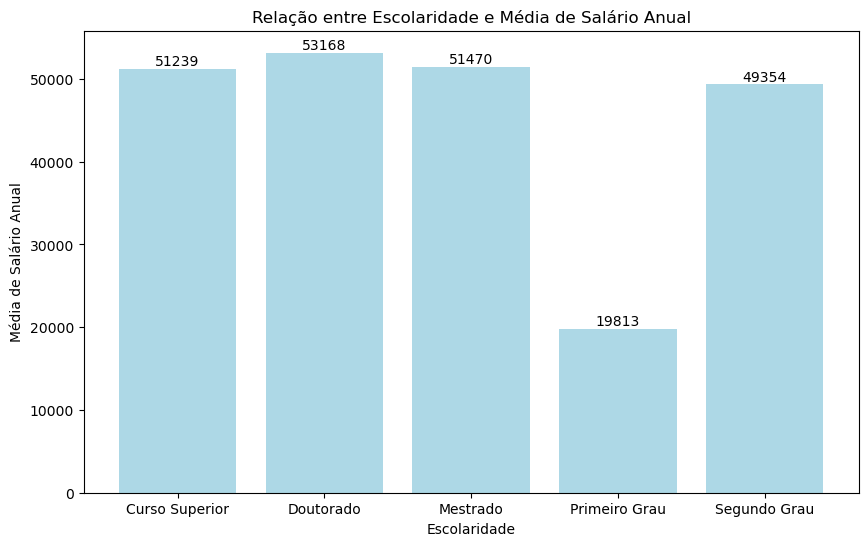

In [58]:
# Agrupar por 'Escolaridade' e calcular a média de 'Salario Anual'
escolaridade_vs_salario = df.groupby('Escolaridade')['Salario Anual'].mean().reset_index()

# Criar o gráfico de barras para a média de salário anual por escolaridade
plt.figure(figsize=(10, 6))

# Criar as barras para o salário anual médio por escolaridade
bars = plt.bar(escolaridade_vs_salario['Escolaridade'], escolaridade_vs_salario['Salario Anual'], color='lightblue')

# Adicionar rótulos no topo de cada barra com o valor médio do salário anual
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionar rótulos aos eixos e título do gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Média de Salário Anual')
plt.title('Relação entre Escolaridade e Média de Salário Anual')

# Exibir o gráfico
plt.show()


**Como podemos ver Doutorado tem um maior média de salário anual, apesar de ser a maior não é a que mais gasta.**

# Como foi o comportamento de compras entre diferentes canais de venda (Compras na Loja vs Web vs Catálogo: )

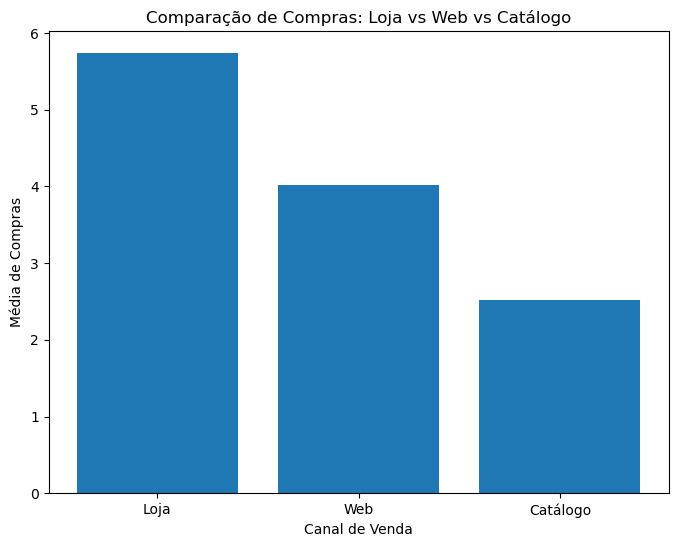

In [59]:

# Calculando a média de compras por canal (Loja, Web, Catálogo)
compras_loja = df['Numero de Compras na Loja'].mean()
compras_web = df['Numero de Compras na Web'].mean()
compras_catalogo = df['Numero de Compras via Catalogo'].mean()

# Criando um gráfico de barras para comparar os canais
canais = ['Loja', 'Web', 'Catálogo']
media_compras = [compras_loja, compras_web, compras_catalogo]

plt.figure(figsize=(8, 6))
plt.bar(canais, media_compras)
plt.title('Comparação de Compras: Loja vs Web vs Catálogo')
plt.xlabel('Canal de Venda')
plt.ylabel('Média de Compras')
plt.show()


**Usamos a média e vimos que compras na loja tem um maior número de compras, compras via catálago tem a menor média de compra**

# Análise Temporal:

O ano com mais cadastros é 2023 com 524 clientes.


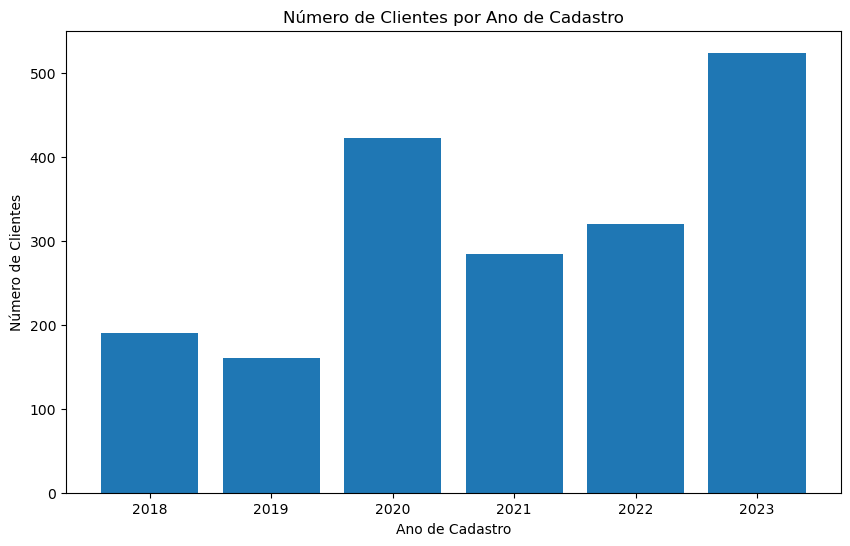

   Ano de Cadastro  Total de Compras
0             2018                12
1             2019                43
2             2020                59
3             2021                32
4             2022                78
5             2023                61


<function matplotlib.pyplot.show(close=None, block=None)>

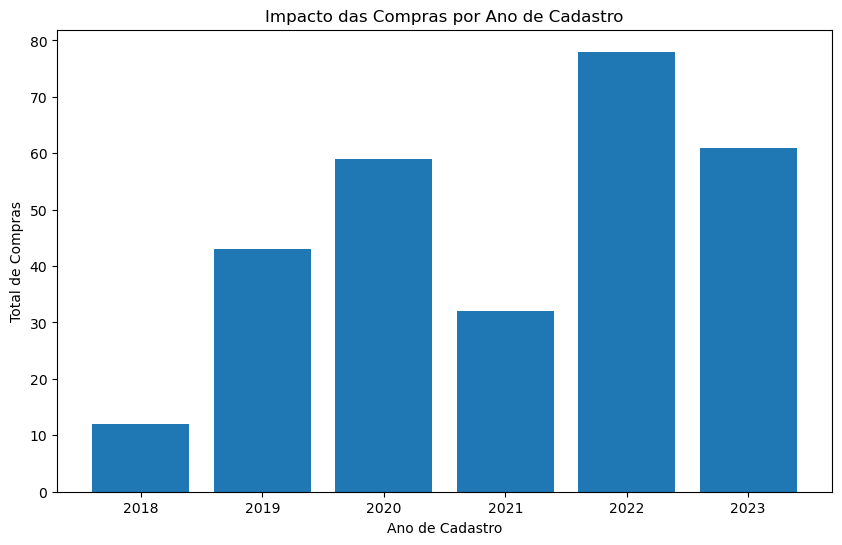

In [60]:
# Converter a coluna 'Data de Cadastro' para o tipo datetime, caso não esteja
df['Data Cadastro Convertido'] = pd.to_datetime(df['Data Cadastro Convertido'], errors='coerce')

# Criar uma nova coluna 'Ano de Cadastro' para facilitar a análise
df['Ano de Cadastro'] = df['Data Cadastro Convertido'].dt.year

# Agrupar por ano de cadastro e contar o número de clientes
cadastro_por_ano = df.groupby('Ano de Cadastro').size().reset_index(name='Número de Clientes')

# Exibir o período com a maioria dos cadastros
ano_mais_cadastros = cadastro_por_ano.loc[cadastro_por_ano['Número de Clientes'].idxmax()]
print(f"O ano com mais cadastros é {ano_mais_cadastros['Ano de Cadastro']} com {ano_mais_cadastros['Número de Clientes']} clientes.")

# Plotar o número de cadastros por ano
plt.figure(figsize=(10, 6))
plt.bar(cadastro_por_ano['Ano de Cadastro'], cadastro_por_ano['Número de Clientes'])
plt.xlabel('Ano de Cadastro')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes por Ano de Cadastro')
plt.show()

# Analisar como o ano de cadastro impacta as compras
# Supondo que a coluna 'Comprou' indique se o cliente comprou (1) ou não (0)
compras_por_ano = df.groupby('Ano de Cadastro')['Comprou'].sum().reset_index(name='Total de Compras')

# Exibir o impacto das compras por ano de cadastro
print(compras_por_ano)

# Plotar o total de compras por ano de cadastro
plt.figure(figsize=(10, 6))
plt.bar(compras_por_ano['Ano de Cadastro'], compras_por_ano['Total de Compras'])
plt.xlabel('Ano de Cadastro')
plt.ylabel('Total de Compras')
plt.title('Impacto das Compras por Ano de Cadastro')
plt.show


**O ano de 2018 registrou o menor número de compras, mesmo que o ano de 2023 tenha tido o maior número de novos cadastros. Curiosamente, foi em 2022 que os clientes realizaram o maior volume de compras, demonstrando uma forte adesão aos produtos nesse período. No entanto, essa tendência não se manteve no ano seguinte, com uma queda perceptível nas vendas em 2023, apesar do crescimento no número de cadastros.**

# Como está a distribuíção dos clientes desde a útima compra ?

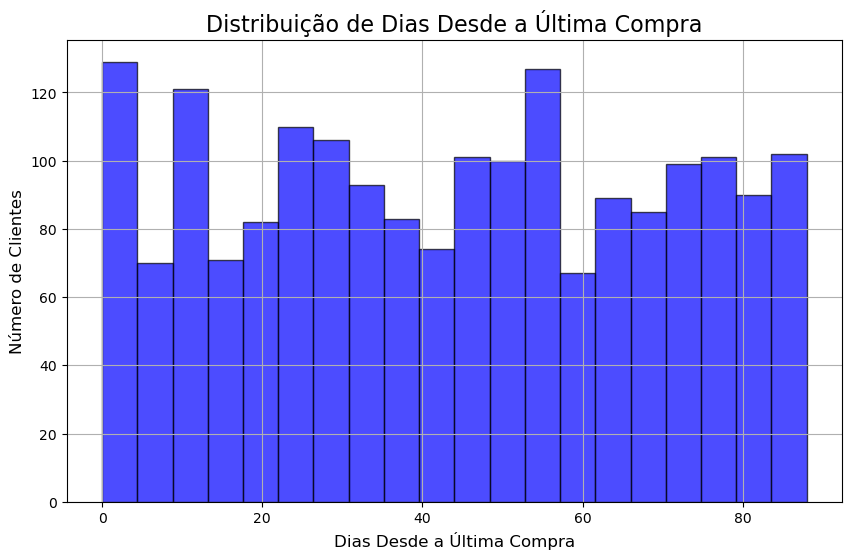

count    1900.000000
mean       43.632632
std        25.815826
min         0.000000
25%        22.000000
50%        44.500000
75%        66.000000
max        88.000000
Name: Dias Desde Ultima Compra, dtype: float64

In [61]:

# Criar o gráfico de distribuição dos dias desde a última compra
plt.figure(figsize=(10, 6))
plt.hist(df['Dias Desde Ultima Compra'].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribuição de Dias Desde a Última Compra', fontsize=16)
plt.xlabel('Dias Desde a Última Compra', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(True)

# Exibir o gráfico
plt.show()

# Analisando a coluna "Dias Desde Ultima Compra"
df['Dias Desde Ultima Compra'] = pd.to_numeric(df['Dias Desde Ultima Compra'], errors='coerce')

# Verificando os padrões de recorrência com base no tempo desde a última compra
dias_ultima_compra_stats = df['Dias Desde Ultima Compra'].describe()

# Exibir estatísticas descritivas para identificar padrões
dias_ultima_compra_stats


**A maioria dos clientes realizou sua última compra há aproximadamente 22 a 66 dias, com uma média de cerca de 44 dias. No entanto, existe uma variação significativa, com alguns clientes fazendo compras bem recentemente e outros até 88 dias atrás. Essa informação pode ser útil para criar estratégias de marketing direcionadas a grupos que fazem compras em intervalos específicos.**

# Análise Geográfica:

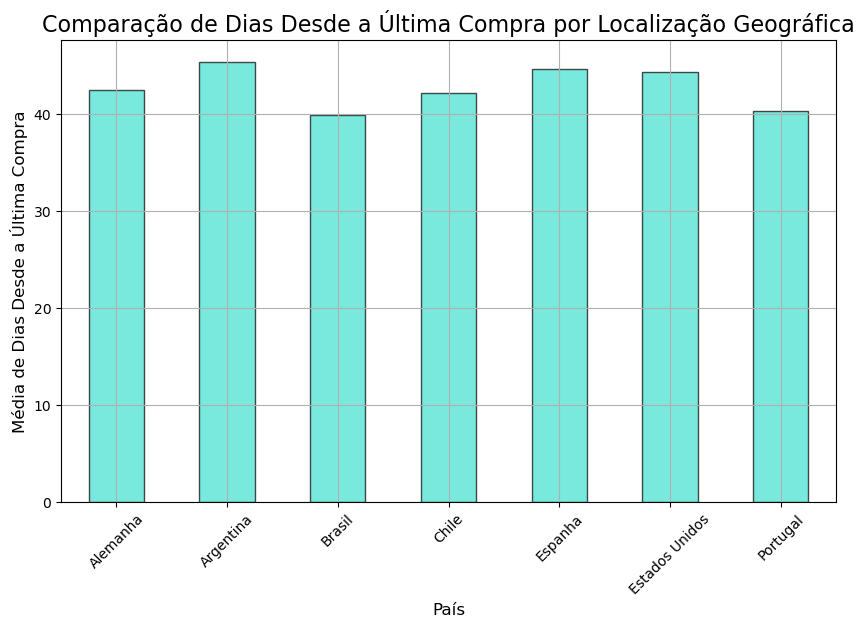

In [62]:

# Agrupar os dados por país e calcular a média dos dias desde a última compra
location_purchases = df.groupby('Pais')['Dias Desde Ultima Compra'].describe()

# Criar um gráfico de barras para comparar a média de dias desde a última compra por país
plt.figure(figsize=(10, 6))
location_purchases['mean'].plot(kind='bar', color='turquoise', alpha=0.7, edgecolor='black')
plt.title('Comparação de Dias Desde a Última Compra por Localização Geográfica', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Média de Dias Desde a Última Compra', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Exibir o gráfico
plt.show()


**Brasil e portugal são os paises que tem a média de clientes com o menor intervalo de tempo desde a última compra**.

# Como estão distribuídos os países em relação à compra dos clientes ?

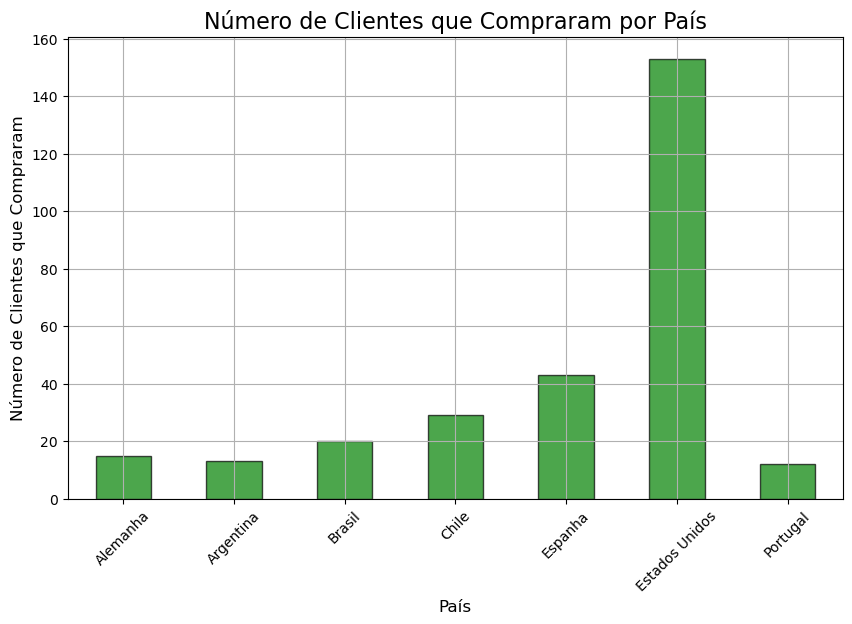

In [63]:
# Criar um gráfico de barras para mostrar o número de compras (quantidade de clientes que compraram) por país
comprou_por_pais = df.groupby('Pais')['Comprou'].sum()

# Criar o gráfico
plt.figure(figsize=(10, 6))
comprou_por_pais.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Número de Clientes que Compraram por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Clientes que Compraram', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Exibir o gráfico
plt.show()


**Claramente, países como Estados Unidos e Espanha lideram o número de clientes que realizaram compras. Esses países podem representar os mercados mais importantes para a empresa, e podem merecer mais atenção em estratégias de marketing.**

**Países como Portugal e Alemanha têm menos clientes comprando. Isso pode ser uma oportunidade para melhorar a presença no mercado ou entender o que pode estar limitando as compras nesses locais. Campanhas promocionais ou ajustes de produto podem ser úteis aqui.**

# Distribuição do número de clientes por estado civil em cada país.

<Figure size 1200x700 with 0 Axes>

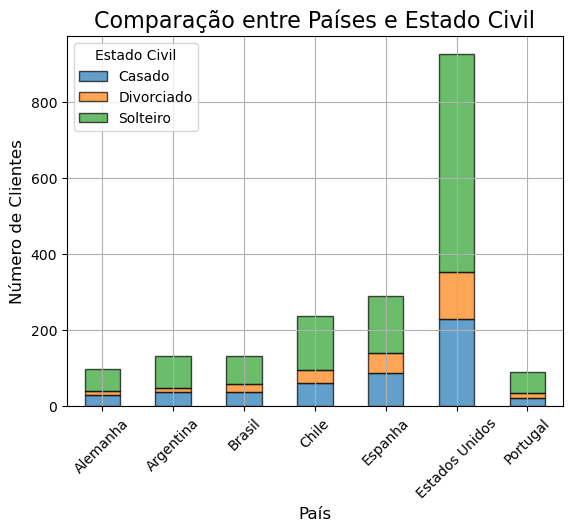

In [87]:
# Agrupar os dados por País e Estado Civil para contar o número de clientes em cada categoria
estado_civil_por_pais = df.groupby(['Pais', 'Estado Civil']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas com cores personalizadas
plt.figure(figsize=(12, 7))
estado_civil_por_pais.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Comparação entre Países e Estado Civil', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Exibir o gráfico
plt.show()


**As variações entre os estados civis em diferentes países podem ser exploradas em estratégias de segmentação. Por exemplo, países com uma proporção maior de clientes solteiros poderiam receber campanhas focadas em perfis de consumidores individuais, enquanto países com mais casados poderiam receber campanhas mais voltadas para famílias.**

In [ ]:
df

# Quais fatores demográficos influenciam mais os gastos dos clientes em diferentes categorias de produtos ?

## Gasto com Eletronicos:

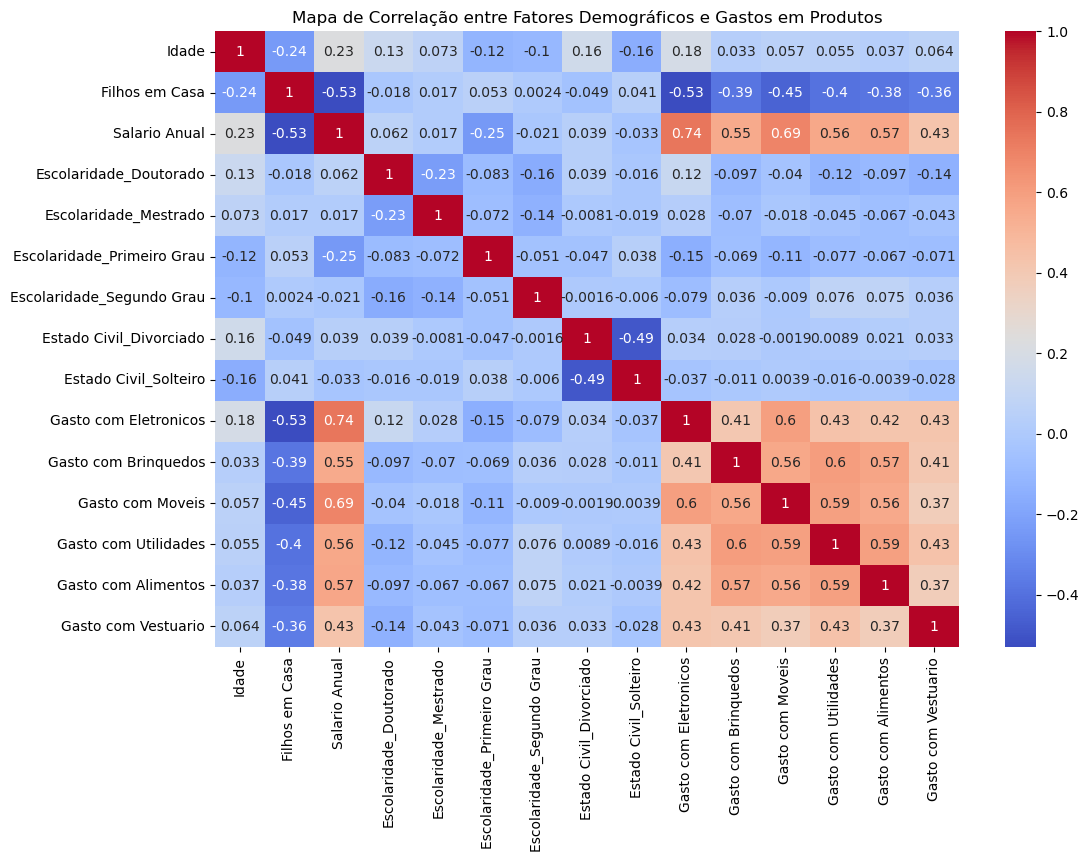

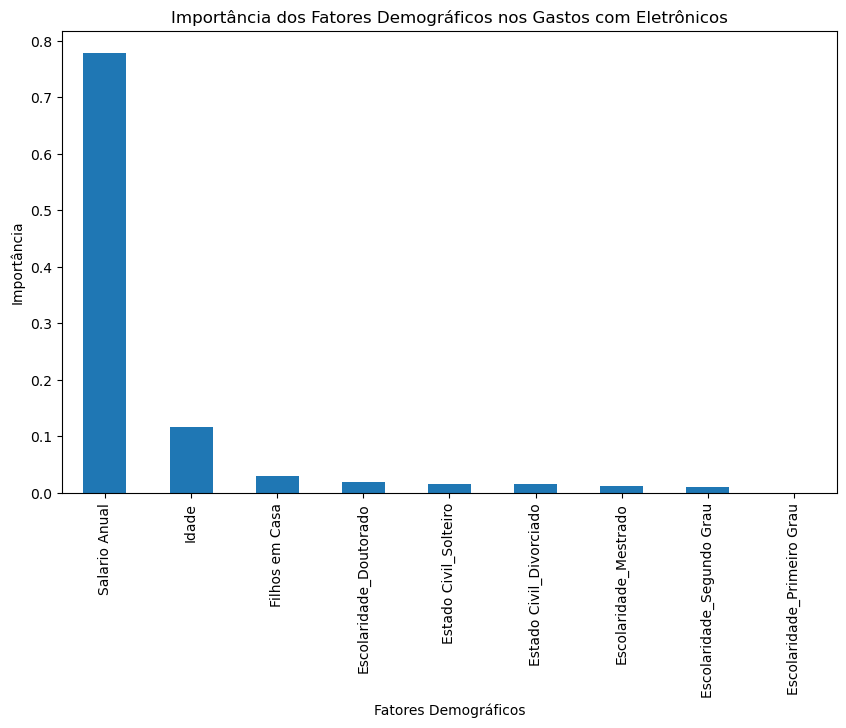

In [65]:
# Selecionar as variáveis demográficas e os gastos nas diferentes categorias de produtos
variaveis_demograficas = ['Idade', 'Escolaridade', 'Estado Civil', 'Filhos em Casa', 'Salario Anual']
gastos_categorias = ['Gasto com Eletronicos', 'Gasto com Brinquedos', 'Gasto com Moveis', 'Gasto com Utilidades', 'Gasto com Alimentos', 'Gasto com Vestuario']

# Converter variáveis categóricas em numéricas (se necessário)
df_demografico = pd.get_dummies(df[variaveis_demograficas], drop_first=True)

# Normalizar as variáveis demográficas para compará-las melhor
scaler = StandardScaler()
df_demografico_scaled = scaler.fit_transform(df_demografico)

# Criar um DataFrame com as variáveis demográficas normalizadas e os gastos
df_combined = pd.concat([pd.DataFrame(df_demografico_scaled, columns=df_demografico.columns), df[gastos_categorias].reset_index(drop=True)], axis=1)

# Verificar correlações
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Fatores Demográficos e Gastos em Produtos')
plt.show()

# Aplicar um modelo de árvore de decisão para analisar a importância das variáveis
X = df_demografico_scaled
y = df['Gasto com Eletronicos']  # Exemplo de uma categoria de produto

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar Random Forest para avaliar a importância das variáveis
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

# Avaliar a importância das variáveis
importances = modelo.feature_importances_
indices = pd.Series(importances, index=df_demografico.columns).sort_values(ascending=False)

# Visualizar as importâncias
plt.figure(figsize=(10, 6))
indices.plot(kind='bar')
plt.title('Importância dos Fatores Demográficos nos Gastos com Eletrônicos')
plt.xlabel('Fatores Demográficos')
plt.ylabel('Importância')
plt.show()


 **Salário influência fortemente os gastos com Eletronicos, seguida pela idade especialmente produtos de maior valor como eletrônicos e móveis.**

# Qual é o perfil dos clientes mais engajados em campanhas de marketing ?

In [72]:

# Criar uma nova coluna que conta o número de campanhas em que o cliente fez uma compra
df['Total Campanhas Comprou'] = (
    df[['Compra na Campanha 1', 'Compra na Campanha 2', 'Compra na Campanha 3', 
                     'Compra na Campanha 4', 'Compra na Campanha 5']].sum(axis=1)
)

# Filtrar os clientes que fizeram compras em pelo menos 3 campanhas
clientes_engajados = df[df['Total Campanhas Comprou'] >= 3]

# Visualizar o perfil dos clientes mais engajados, agregando algumas características chave
perfil_engajados = clientes_engajados.groupby(['Escolaridade', 'Estado Civil']).agg({
    'Salario Anual': 'mean',
    'Filhos em Casa': 'mean',
    'Adolescentes em Casa': 'mean',
    'Total Campanhas Comprou': 'size'
}).reset_index()

# Exibir o resultado
print(perfil_engajados)


      Escolaridade Estado Civil  Salario Anual  Filhos em Casa  \
0   Curso Superior       Casado   86071.666667        0.000000   
1   Curso Superior   Divorciado   85168.600000        0.000000   
2   Curso Superior     Solteiro   78656.222222        0.000000   
3        Doutorado       Casado   93310.000000        0.000000   
4        Doutorado     Solteiro   79339.200000        0.000000   
5         Mestrado       Casado   88420.000000        0.000000   
6         Mestrado   Divorciado   84953.000000        0.000000   
7         Mestrado     Solteiro   82922.666667        0.333333   
8     Segundo Grau       Casado   82326.000000        0.000000   
9     Segundo Grau   Divorciado   65706.000000        0.000000   
10    Segundo Grau     Solteiro   96547.000000        0.000000   

    Adolescentes em Casa  Total Campanhas Comprou  
0               0.000000                        3  
1               0.000000                        5  
2               0.000000                        9  

**Os clientes mais engajados em campanhas de marketing tendem a ser solteiros com "Curso Superior", sem filhos ou adolescentes em casa, e com uma média salarial acima de R$78.000, o engajamento parece estar relacionado a uma combinação de escolaridade elevada e estado civil (principalmente solteiros e divorciados), com um perfil de cliente que não possui dependentes em casa, o que pode facilitar o foco em campanhas e promoções.**

# A relação entre o estado civil, escolaridade e renda com o volume de compras ?

In [78]:
# Criar uma nova coluna que representa o volume total de compras (somando todas as formas de compras)
df['Volume Total Compras'] = (
    df['Numero de Compras com Desconto'] + 
    df['Numero de Compras na Web'] +
    df['Numero de Compras via Catalogo'] +
    df['Numero de Compras na Loja']
)

# Agrupar os dados por Escolaridade e Estado Civil, calculando a média do salário e o volume total de compras
relacao_compras = df.groupby(['Escolaridade', 'Estado Civil']).agg({
    'Salario Anual': 'mean',
    'Volume Total Compras': 'mean'
}).reset_index()

# Exibir os resultados
print(relacao_compras)


      Escolaridade Estado Civil  Salario Anual  Volume Total Compras
0   Curso Superior       Casado   52410.724696             15.441296
1   Curso Superior   Divorciado   52549.969925             14.744361
2   Curso Superior     Solteiro   50452.784380             14.730051
3        Doutorado       Casado   53124.020202             14.808081
4        Doutorado   Divorciado   54503.303030             16.454545
5        Doutorado     Solteiro   52806.406926             14.952381
6         Mestrado       Casado   50661.622222             14.744444
7         Mestrado   Divorciado   52966.595238             15.476190
8         Mestrado     Solteiro   51526.342541             14.325967
9    Primeiro Grau       Casado   20681.083333              5.583333
10   Primeiro Grau   Divorciado   15835.500000              6.500000
11   Primeiro Grau     Solteiro   19743.600000              6.914286
12    Segundo Grau       Casado   46307.212766             14.468085
13    Segundo Grau   Divorciado   

**Clientes mais engajados e com maior volume de compras são geralmente aqueles com maior nível de escolaridade, especialmente os divorciados com "Doutorado" e "Curso Superior". Eles tendem a ganhar salários mais altos e ter um volume total de compras significativamente maior.
Clientes com menor engajamento e menor volume de compras são os que possuem "Primeiro Grau", independentemente do estado civil. Eles também possuem os menores salários, o que pode limitar seu comportamento de compra.**

# Como as compras variam entre diferentes canais (web, catálogo, loja física) e como isso pode ser otimizado ?

In [84]:
# Somar o número total de compras realizadas em cada canal
compras_canal = df[['Numero de Compras na Web', 'Numero de Compras via Catalogo', 'Numero de Compras na Loja']].sum()

# Calcular o número total de compras somando todas as compras feitas em todos os canais
total_compras = compras_canal.sum()

# Calcular a proporção de compras de cada canal em relação ao número total de compras únicas
compras_canal_proporcao = compras_canal / total_compras

# Criar um DataFrame para exibir a soma de compras e a proporção correta
resultado = pd.DataFrame({
    'Soma de Compras': compras_canal,
    'Proporcao (%)': (compras_canal_proporcao * 100)
})

# Exibir os resultados corretamente
print(resultado)


                                Soma de Compras  Proporcao (%)
Numero de Compras na Web                   7625      32.711283
Numero de Compras via Catalogo             4786      20.531961
Numero de Compras na Loja                 10899      46.756757


**A maior parte das compras é realizada nas lojas físicas, representando 46% do total. Por outro lado, as compras via catálogo são as menos frequentes, correspondendo a apenas 20% das transações em diferentes canais de venda. Esse padrão sugere que, embora existam opções de compra diversificadas, os clientes ainda preferem a experiência presencial das lojas físicas em comparação com outros meios, como catálogos.**

‎ 

# <span style="color:red;">Storytelling</span>


>A análise dos dados revela uma distribuição salarial relativamente equilibrada, com a maioria dos clientes ganhando entre  30.000 e  70.000, e um salário médio de 51.626,38. Isso oferece uma visão de um público diversificado em termos de poder aquisitivo, que se reflete também nos gastos com eletrônicos. O gasto médio nessa categoria é de  268,83, com uma grande parte das compras técnicas entre  1 e  100 reais, diminuindo a predominância de eletrônicos mais acessíveis. Ainda assim, há uma dispersão significativa de clientes que gastam valores maiores nessa categoria.

> Curiosamente, foi descoberto um forte brilho entre as compras de eletrônicos e as realizadas pela web, enquanto os gastos com móveis estão mais associados às compras via catálogo. Isso sugere que o meio de compra escolhido pelos clientes pode estar diretamente relacionado ao tipo de produto adquirido.

> No entanto, uma análise das campanhas de marketing revela um ponto de preocupação: nenhuma das cinco campanhas foi bem sucedida, pois a maioria dos clientes não fez compras durante esse período. Esse resultado indica que a estratégia de marketing atual não está gerando o engajamento esperado, e uma revisão das abordagens é essencial para aumentar a taxa de conversão em campanhas futuras.

> Quanto aos padrões de consumo, não há uma relação clara entre idade e os valores gastos em diferentes categorias de produtos. Por outro lado, o nível de escolaridade desempenha um papel decisivo. Clientes com ensino superior gastaram significativamente mais em todas as categorias comprovadas – eletrônicos, móveis, brinquedos, vestuário e alimentos. Em contrapartida, aqueles com apenas o primeiro grau apresentam os menores gastos.

> Além disso, clientes solteiros também demonstram um comportamento de consumo mais elevado, especialmente nas categorias como móveis, eletrônicos, brinquedos, vestuário e alimentos. Essa tendência sugere que o estado civil, juntamente com a escolaridade, pode ser um fator-chave para segmentação de mercado.

> Uma descoberta interessante foi a de que pais solteiros, com nível superior e sem filhos em casa, apresentam um alto gasto com eletrônicos. Isso revela um perfil de cliente engajado com tecnologia, provavelmente com maior poder aquisitivo e mais tempo disponível para consumo.

> Ao observar os dados de compras ao longo do tempo, identificamos que 2023 foi o ano com o maior número de cadastros, enquanto 2022 registrou o maior volume de compras. Curiosamente, o ano de 2018 teve o menor número de transações, apesar do aumento no número de cadastros nos anos seguintes. Essa variação sugere que, mesmo com um aumento no número de clientes cadastrados, fatores externos ou estratégias de marketing podem ter impacto nas vendas em 2023.

> Em termos de frequência de compras, a maioria dos clientes realizou sua última compra há entre 22 e 66 dias, com uma média de 44 dias desde a última transação. Essa informação pode ser extremamente útil para desenvolver campanhas de reengajamento focadas em intervalos de tempo específicos.

> Geograficamente, países como Brasil e Portugal têm clientes com menor intervalo de tempo desde a última compra. No entanto, Estados Unidos e Espanha lideraram o volume de compras, indicando que esses mercados são prioritários. Países como Portugal e Alemanha, com menos clientes comprando, representam uma oportunidade de crescimento, exigindo estratégias personalizadas para aumentar o engajamento nesses locais.

> Outro fator significativo é a influência do salário no comportamento de compra. Clientes com rendas mais altas, especialmente aqueles com doutorado e ensino superior, tendem a gastar mais em eletrônicos e móveis. Esses consumidores, em sua maioria solteiros e divorciados, sem filhos em casa, são os mais engajados em campanhas de marketing e representam um público valioso para futuras iniciativas.

> Em termos de canais de venda, as lojas físicas continuam sendo o principal ponto de compras, representando 46% do total, enquanto as compras via catálogo têm uma participação menor, com apenas 20%. Embora os clientes tenham diversas opções de compra, a experiência presencial parece ser preferida, o que sugere a necessidade de integrar as estratégias online com a experiência física.

# FIM.

É com grande satisfação que concluo este projeto de análise de dados, movido pela minha paixão e interesse no mundo da informação através dos dados. Confesso que não foi um processo rápido, mas consegui, e continuo em constante evolução na minha carreira em dados. Ainda tenho muito a aprender, e a cada dia e a cada semana estou adquirindo mais conhecimento. A você, que dedicou seu tempo precioso para analisar este projeto, meu sincero muito obrigado!